In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from leela_interp.core.effect_study import *

In [4]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = Lc0sight("lc0.onnx", device=device)

Using device: cpu


In [18]:
study = EffectStudy(model, puzzlename="", n_examples=50)

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  map_location=self.device
/home/dcruz/Pivotal/leela-

The full dataset actually has 4M puzzles, but the scripts only consider the first 1M, and the default filters reduce that to 22k.

In [7]:
len(study.puzzles)

22517

In [82]:
len(study.good_results['11234'])

3126

Max accuracy (main, L11): 0.77 +- 0.10
Max accuracy (main, L12): 0.74 +- 0.10
Max accuracy (random_model, L7): 0.26 +- 0.11
Max accuracy (random_model, L7): 0.13 +- 0.09


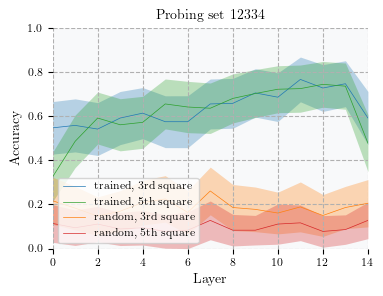

In [19]:
case_number = 1123456
case_number = 1123344
case_number = 11223
case_number = 11234
case_number = 12344
case_number = 11233
case_number = 12345
case_number = 12334
n_seeds = 5

SETTING_TO_PRETTY_NAME = {
    ("main", 3): "trained, 3rd square",
    ("main", 5): "trained, 5th square",
    ("random_model", 3): "random, 3rd square",
    ("random_model", 5): "random, 5th square",
}

if len(str(case_number)) == 7:
    SETTING_TO_PRETTY_NAME[("main", 7)] = "trained, 7th square"
    SETTING_TO_PRETTY_NAME[("random_model", 7)] = "random, 7th square"

def plot_probe_results(split="all"):
    fh.set(fast=False)
    plt.figure(figsize=(fh.HALF_WIDTH*1.5, 2*1.5))

    for i, setting in enumerate(["main", "random_model"]):
        for j, goal_square in enumerate(range(3, len(str(case_number)) + 1, 2)):
            results = np.zeros((15, n_seeds))
            for seed in range(n_seeds):
                with open(f"results/probing_{case_number}/{split}/{seed}/{goal_square}/{setting}.pkl", "rb") as f:
                    new_results = pickle.load(f)
                    results[:, seed] = new_results["accuracies"]

            means = results.mean(-1)
            squared_seed_errors = results.var(-1) / results.shape[-1]
            # Size of the eval dataset is 30% of all puzzles
            squared_acc_errors = means * (1 - means) / (0.3 * len(study.good_results[str(case_number)]))
            # 2 sigma errors
            errors = 2 * np.sqrt(squared_seed_errors + squared_acc_errors)

            max_layer = means.argmax()

            print(
                f"Max accuracy ({setting}, L{max_layer}): {means[max_layer]:.2f} +- {errors[max_layer]:.2f}"
            )Pivotal/leela-interp/effect_study.ipynb
            plt.plot(
                means,
                label=SETTING_TO_PRETTY_NAME[(setting, goal_square)],
                color=fh.COLORS[2*j + i],
                linewidth=fh.LINE_WIDTH,
            )
            plt.fill_between(
                range(15),
                means - errors,
                means + errors,
                color=fh.COLORS[2*j + i],
                alpha=fh.ERROR_ALPHA,
                linewidth=0,
            )

    plt.title(f"Probing set {case_number}")
    plt.xlabel("Layer")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")

    plt.ylim(0, 1.0)
    plt.xlim(0, 14)
    plt.gca().spines[:].set_visible(False)
    plt.gca().set_facecolor(fh.PLOT_FACE_COLOR)
    plt.grid(linestyle="--")
    plt.grid(which="minor", alpha=0.3, linestyle="--")

plot_probe_results()
fh.save(f"probing_{case_number}.pdf")

In [97]:
len(study.good_results['12344']), len(study.good_results['11234']), len(study.good_results['11223']), len(study.good_results['1123456']), len(study.good_results['1123344'])

(160, 3126, 185, 130, 57)

In [11]:
len(study.good_results['11233']), len(study.good_results['12345'])

(676, 430)

In [14]:
[(key, len(value)) for key, value in study.good_results.items()]

[('112', 7394),
 ('111', 3853),
 ('11234', 3126),
 ('123', 2455),
 ('11231', 1360),
 ('11233', 676),
 ('12345', 430),
 ('11222', 305),
 ('12334', 237),
 ('11112', 227),
 ('11123', 222),
 ('12333', 218),
 ('11122', 204),
 ('122', 202),
 ('11223', 185),
 ('12344', 160),
 ('1123456', 130),
 ('11221', 98),
 ('12342', 65),
 ('11111', 61),
 ('1123344', 57),
 ('12223', 56)]

In [4]:
# Load lichess_db_puzzle.csv as a pandas DataFrame
# puzzles_original = pd.read_csv("lichess_db_puzzle.csv")
# puzzles_original.shape

In [5]:
# figure_dir = Path("figures")
# figure_dir.mkdir(exist_ok=True)
# different_targets_dir = figure_dir / "different_targets"
# different_targets_dir.mkdir(exist_ok=True)
# same_targets_dir = figure_dir / "same_targets"
# same_targets_dir.mkdir(exist_ok=True)

In [6]:
# boards = [LeelaBoard.from_puzzle(puzzle) for _, puzzle in puzzles.iterrows()]
# first_target_squares = [
#     puzzle.principal_variation[0][2:4] for _, puzzle in puzzles.iterrows()
# ]
# second_target_squares = [
#     puzzle.principal_variation[1][2:4] for _, puzzle in puzzles.iterrows()
# ]
# third_target_squares = [
#     puzzle.principal_variation[2][2:4] for _, puzzle in puzzles.iterrows()
# ]
# first_target_indices = np.array(
#     [board.sq2idx(square) for board, square in zip(boards, first_target_squares)]
# )
# second_target_indices = np.array(
#     [board.sq2idx(square) for board, square in zip(boards, second_target_squares)]
# )
# third_target_indices = np.array(
#     [board.sq2idx(square) for board, square in zip(boards, third_target_squares)]
# )

# Tree search

In [38]:
import pandas as pd
from leela_interp import Lc0Model

def diogo_get_top_moves(
    model: Lc0Model,
    board: LeelaBoard,
    limit = 3,
    min_prob = 0.1,
) -> dict[str, dict[str, float]]:
    
    if limit == 0:
        return {}

    policy, _, _ = model.batch_play([board], return_probs=True)
    not_nan = ~torch.isnan(policy).any(-1)
    num_not_nan = not_nan.sum().item()
    assert isinstance(num_not_nan, int)  # make the type checker happy
    assert torch.allclose(
        policy[not_nan].sum(-1),
        torch.ones(num_not_nan, device=policy.device),
    ), policy.sum(-1)

    try:
        top_moves = model.top_moves(board, policy[0], top_k=None)
    except AssertionError:
        #print(board)
        #print(policy)
        top_moves = {}

    # Remove all entries where val is not above 0.1
    top_moves = {k: v for k, v in top_moves.items() if v > min_prob}
    model_moves = list(top_moves.keys())

    top_dict = {}
    for model_move in model_moves:
        new_board = board.copy()
        new_board.push_uci(model_move)
        top_dict_partial = diogo_get_top_moves(model, new_board, limit-1)
        top_dict[model_move] = {'prob': top_moves[model_move]}
        top_dict[model_move] = top_dict[model_move] | top_dict_partial

    print(limit, top_dict)
    return top_dict

In [58]:
puzzle = study.puzzles.iloc[5]
board = LeelaBoard.from_puzzle(puzzle)

In [59]:
correct_moves = puzzle.Moves.split()
total_moveset = {puzzle.Moves.split()[0]: {'prob': 1.0} | diogo_get_top_moves(model, board, limit=5, min_prob=0.05)}

1 {'e8f8': {'prob': 0.4468752443790436}, 'e8d7': {'prob': 0.4053167998790741}, 'e8d8': {'prob': 0.1298011839389801}}
1 {'e8c8': {'prob': 0.5011523365974426}, 'd4e5': {'prob': 0.12634779512882233}}
2 {'f1e1': {'prob': 0.43768253922462463, 'e8f8': {'prob': 0.4468752443790436}, 'e8d7': {'prob': 0.4053167998790741}, 'e8d8': {'prob': 0.1298011839389801}}, 'g2f3': {'prob': 0.23543615639209747, 'e8c8': {'prob': 0.5011523365974426}, 'd4e5': {'prob': 0.12634779512882233}}}
3 {'d8d4': {'prob': 0.9378635287284851, 'f1e1': {'prob': 0.43768253922462463, 'e8f8': {'prob': 0.4468752443790436}, 'e8d7': {'prob': 0.4053167998790741}, 'e8d8': {'prob': 0.1298011839389801}}, 'g2f3': {'prob': 0.23543615639209747, 'e8c8': {'prob': 0.5011523365974426}, 'd4e5': {'prob': 0.12634779512882233}}}}
1 {'h2e5': {'prob': 0.3111232817173004}, 'e8d7': {'prob': 0.2916010320186615}, 'e8f8': {'prob': 0.26906052231788635}, 'e8d8': {'prob': 0.10038061439990997}}
1 {'d4h4': {'prob': 0.3004227876663208}, 'e8c8': {'prob': 0.1457

/tmp/ipykernel_1079472/1708828642.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


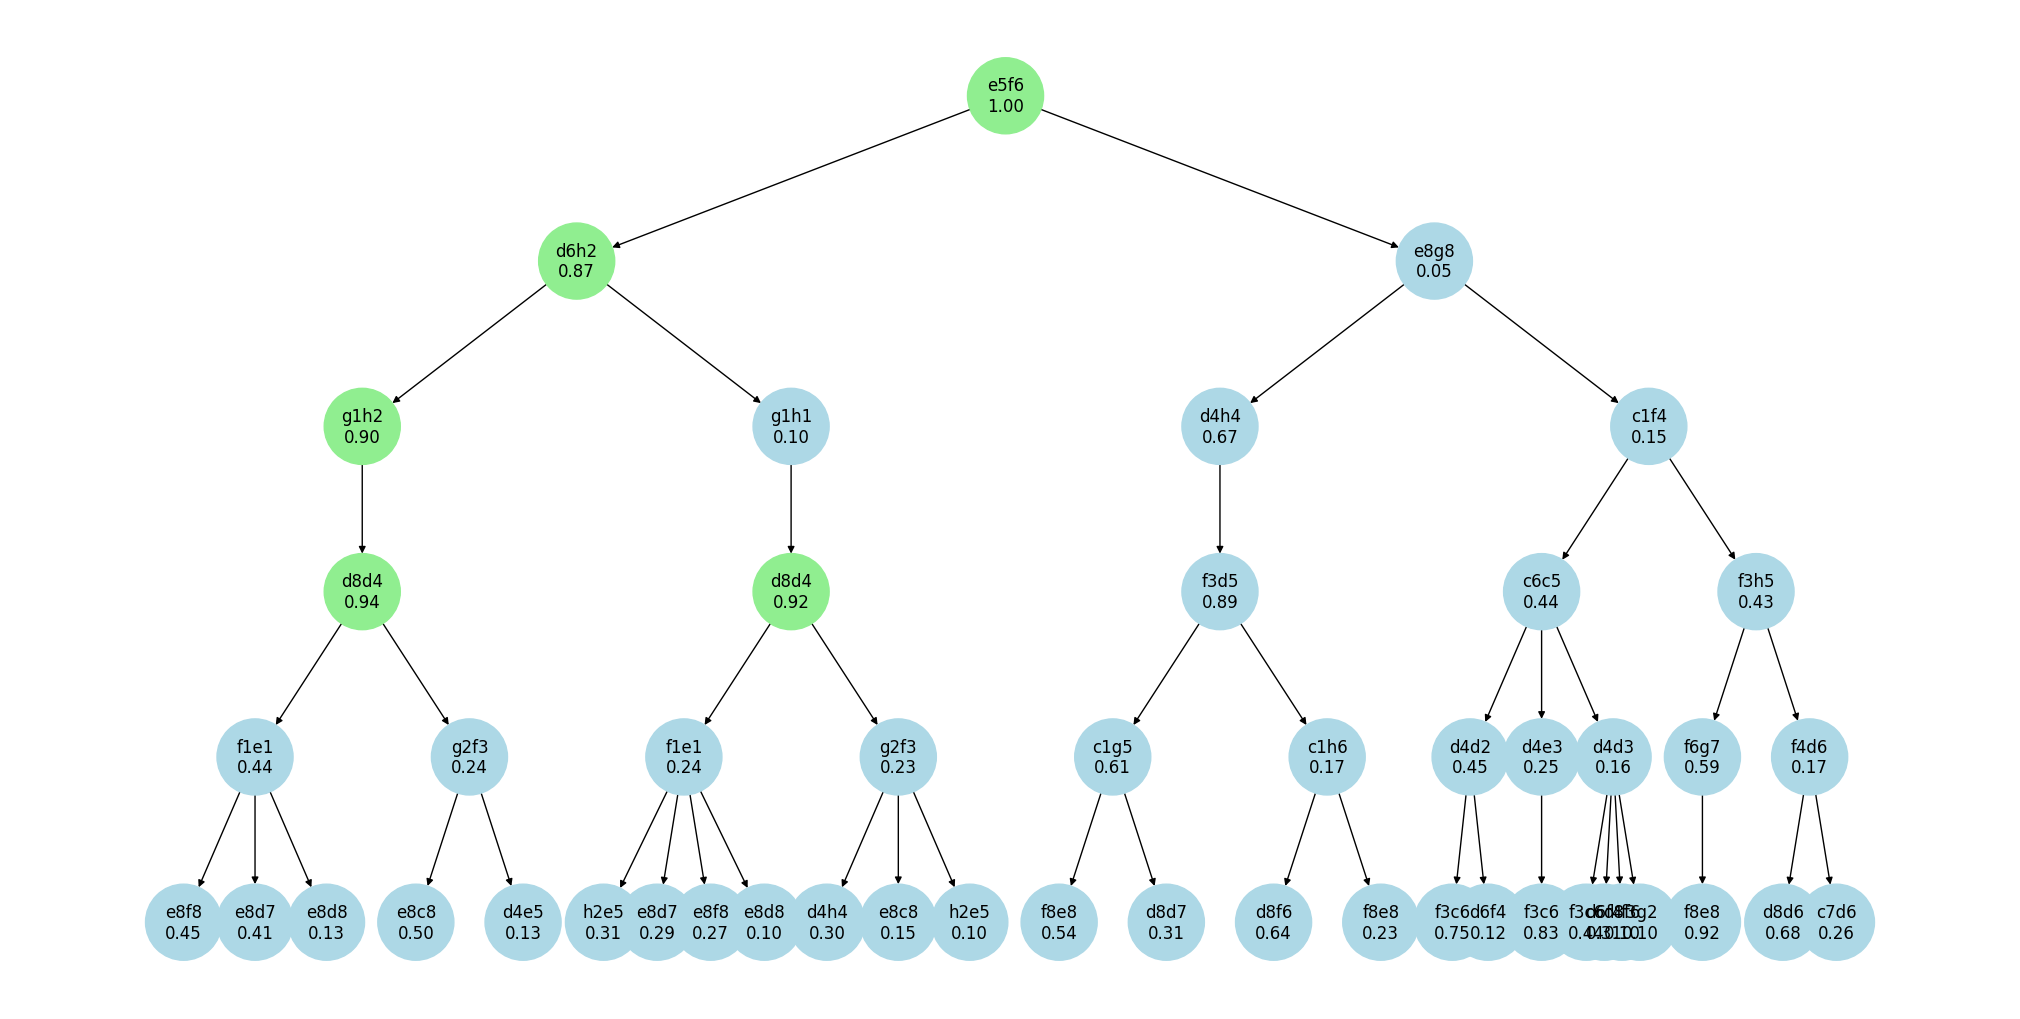

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

def create_tree_graph(tree, parent_path=None, graph=None):
    if graph is None:
        graph = nx.DiGraph()
    
    for move, data in tree.items():
        prob = data['prob']
        path = f"{parent_path}_{move}" if parent_path else move
        label = f"{move}\n{prob:.2f}"
        graph.add_node(path, label=label)
        
        if parent_path:
            graph.add_edge(parent_path, path)
        
        subtree = {k: v for k, v in data.items() if k != 'prob'}
        if subtree:
            create_tree_graph(subtree, path, graph)
    
    return graph

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if root is None:
        roots = [n for n,d in G.in_degree() if d==0]
        if len(roots) > 1:
            root = roots[0]
        else:
            root = roots[0]

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

# Your tree data
tree_data = total_moveset

# Create the graph
G = create_tree_graph(tree_data)

# Set up the plot
plt.figure(figsize=(20, 10))

# Use custom hierarchical layout
pos = hierarchy_pos(G)

# Prepare node colors
node_colors = ['lightblue' if node.split('_')[-1] not in correct_moves else 'lightgreen' for node in G.nodes()]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=3000, node_color=node_colors, 
        font_size=12, font_weight='bold', arrows=True)

# Add labels to nodes
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# Save the figure
plt.axis('off')
plt.tight_layout()
plt.show()

#plt.savefig('move_tree.png', dpi=300, bbox_inches='tight')
#print("Graph has been saved as 'move_tree.png'")

In [39]:
puzzle.principal_variation

['e8e1', 'g1f2', 'e1f1']

In [41]:
display(diff_puzzles.principal_variation.iloc[:5])
diogo_get_lc0_pv_probabilities_single_batch(model, diff_puzzles.iloc[:5])

54597    [a6g6, c5g1, b1f5]
69803    [f3d4, f4f3, h6h7]
79796    [f7g5, d5d4, g5f3]
Name: principal_variation, dtype: object

AssertionError: 

In [39]:
display(diff_puzzles.principal_variation.iloc[:5])
diogo_get_lc0_pv_probabilities_single_batch(model, diff_puzzles.iloc[:5])

54597    [a6g6, c5g1, b1f5]
69803    [f3d4, f4f3, h6h7]
79796    [f7g5, d5d4, g5f3]
Name: principal_variation, dtype: object

{'a6f6': 0.42851027846336365, 'a6g6': 0.4037629961967468, 'b1f5': 0.05111701413989067, 'h3h7': 0.032180871814489365, 'd5d6': 0.005728045012801886, 'g1f1': 0.005466668866574764, 'a6c6': 0.004058551043272018, 'a6b5': 0.0035532235633581877, 'h3g3': 0.003455784171819687, 'b2b4': 0.003141419729217887, 'b1e4': 0.0028727829921990633, 'g1g6': 0.002611294388771057, 'a3a4': 0.002384771825745702, 'b1d3': 0.002362251980230212, 'b2b3': 0.0023307898081839085, 'b1a2': 0.0022952123545110226, 'h3h4': 0.0022775321267545223, 'b1c2': 0.0022463221102952957, 'f3f4': 0.002176506444811821, 'a6a5': 0.002176256151869893, 'a6a7': 0.002138863317668438, 'a6b6': 0.0021197216119617224, 'a6e6': 0.00211249478161335, 'a6a4': 0.0021107466891407967, 'g1e1': 0.002101323800161481, 'g1d1': 0.002099031815305352, 'h3h5': 0.0020979049149900675, 'g1c1': 0.0020974078215658665, 'g1g4': 0.0020902829710394144, 'g1g3': 0.0020748809911310673, 'h3h6': 0.002073464682325721, 'a6d6': 0.0020726253278553486, 'a6b7': 0.0020451454911381006, 

([[0.42851027846336365, 0.6439273953437805, 0.3654814660549164],
  [0.49854618310928345, 0.4714306592941284, 0.4431718587875366],
  [0.40383175015449524, 0.36675697565078735, 0.48784857988357544]],
 [[0.4037629961967468, 0.6439273953437805, 0.3346159756183624],
  [0.43913835287094116, 0.1215149462223053, 0.3101987838745117],
  [0.4013439416885376, 0.27439647912979126, 0.10026105493307114]],
 [['a6f6', 'c5g1', 'h3h7'],
  ['h6h7', 'b3b2', 'd4b3'],
  ['b6b7', 'b3c5', 'g5e4']],
 [[0.25270628929138184, 0.3622598648071289, 0.3850337862968445],
  [0.02690456248819828, 0.6844172477722168, 0.2886781096458435],
  [0.8896704316139221, 0.10820890218019485, 0.002120703924447298]])

In [8]:
# different_targets_mask = puzzles["different_targets"].to_numpy().astype(bool)
# same_targets_mask = ~different_targets_mask
# print(f"Same targets: {same_targets_mask.sum()} ({same_targets_mask.mean():.2%})")
# print(
#     f"Different targets: {different_targets_mask.sum()} ({different_targets_mask.mean():.2%})"
# )

# Global activation patching

## Residual stream

## Mate in 3 examples

11 ['c7c1', 'a1c1', 'c8c1', 'e3c1', 'e8e1']
51 ['h4h8', 'g8h8', 'f4h6', 'h8g8', 'h6g7']
68 ['d3b1', 'd2b1', 'd8d1', 'f3e1', 'd1e1']
73 ['c7d6', 'e7d8', 'c1c8', 'd8c8', 'd6c7']
89 ['f5g3', 'h2g3', 'h4g3', 'a4h4', 'h8h4']


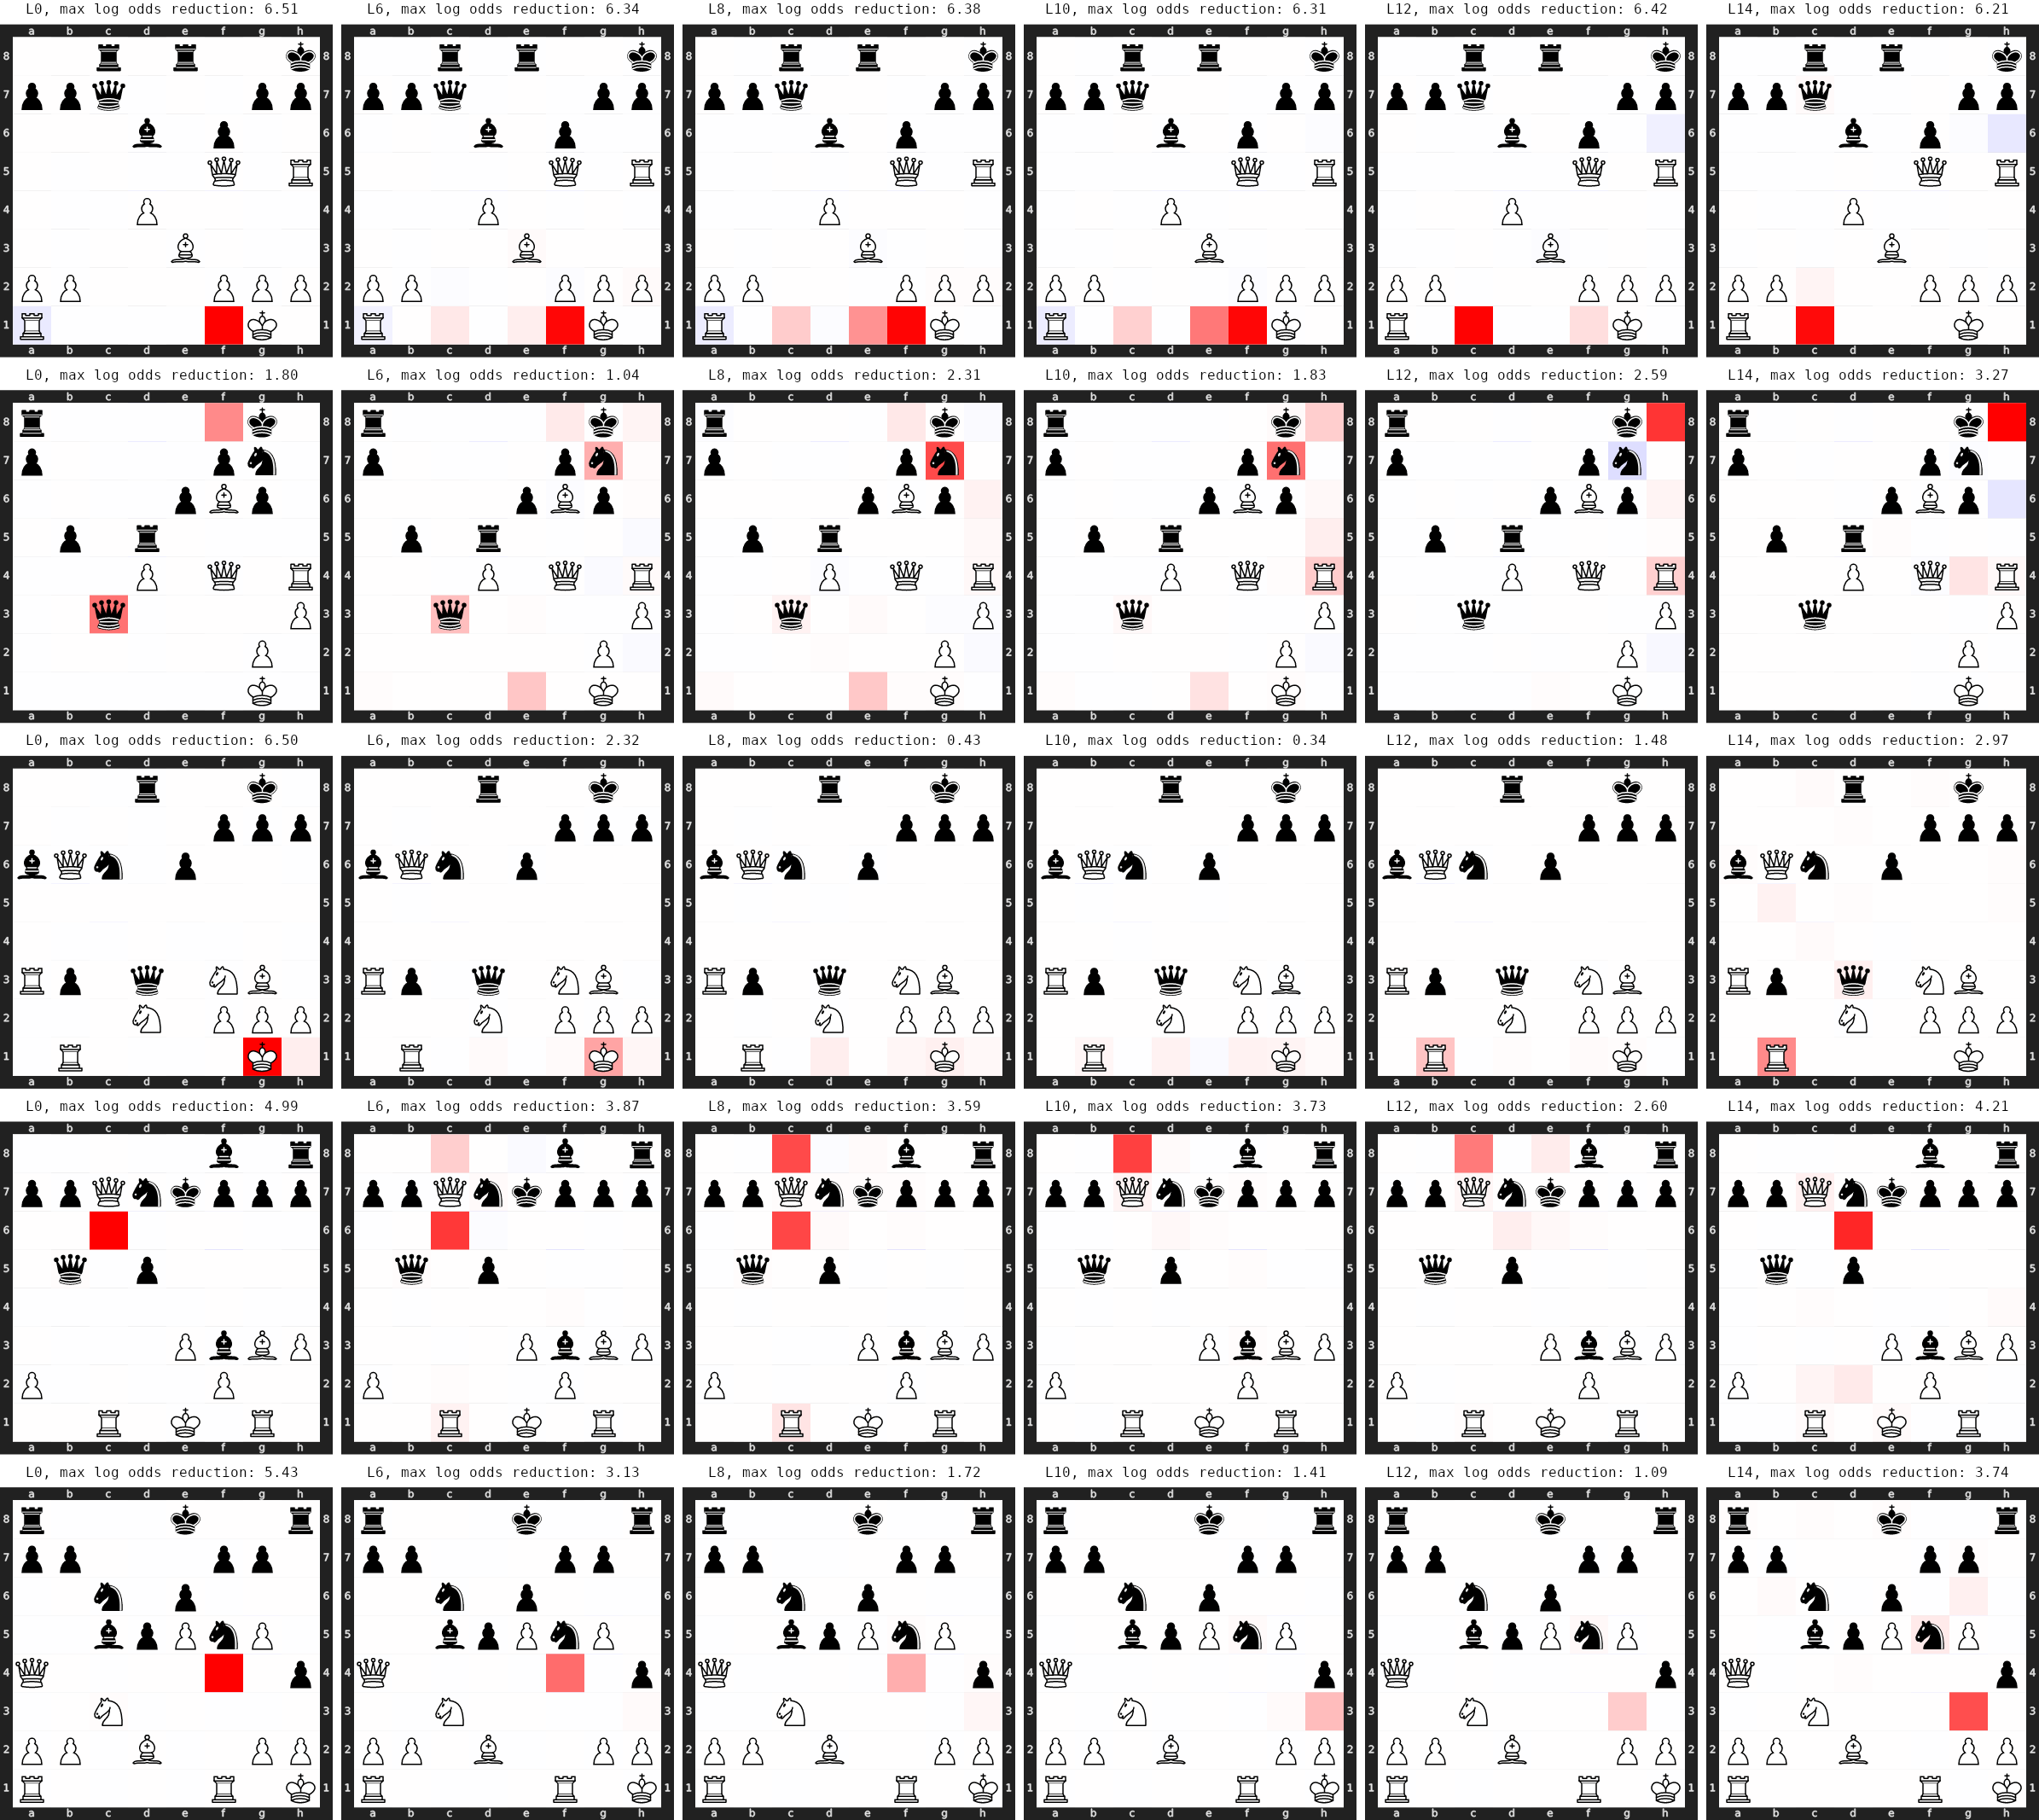

In [9]:
study.plot_examples(n=100)

## Ratings

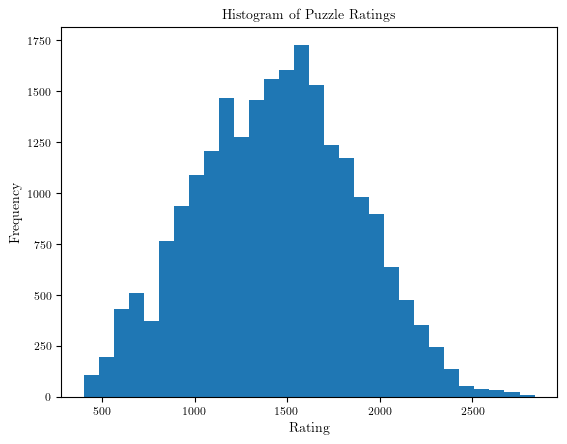

<Figure size 640x480 with 0 Axes>

In [16]:
# # Store puzzle ratings in a numpy array
# puzzle_ratings = puzzles["Rating"].to_numpy()
# puzzle_ratings_all = puzzles_all["Rating"].to_numpy()
# puzzle_ratings_no_forcing = puzzles_no_forcing["Rating"].to_numpy()

# # Plot histogram of puzzle ratings
# plt.hist(puzzle_ratings, bins=30, label="Interesting")
# plt.hist(puzzle_ratings_all, bins=30, label="All")
# plt.hist(puzzle_ratings_no_forcing, bins=30, label="No forcing")
# plt.show()

study.plot_rating_histogram(filename="rating_histogram.pdf")

In [11]:


# result = EffectStudy.get_possibility_indices(puzzles, include_starting=False)
# result_all = EffectStudy.get_possibility_indices(puzzles_all, include_starting=False)
# result_no_forcing = EffectStudy.get_possibility_indices(puzzles_no_forcing, include_starting=False)
# result_starting = get_possibility_indices(puzzles, include_starting=True)
# result_all_starting = get_possibility_indices(puzzles_all, include_starting=True)
# result_no_forcing_starting = get_possibility_indices(puzzles_no_forcing, include_starting=True)

# # Only consider cases with more than N examples
# n_examples = 10
# good_results = {k: v for k, v in result.items() if len(v) > n_examples}
# good_results_all = {k: v for k, v in result_all.items() if len(v) > n_examples}
# good_results_no_forcing = {k: v for k, v in result_no_forcing.items() if len(v) > n_examples}
# good_results_starting = {k: v for k, v in result_starting.items() if len(v) > n_examples}
# good_results_all_starting = {k: v for k, v in result_all_starting.items() if len(v) > n_examples}
# good_results_no_forcing_starting = {k: v for k, v in result_no_forcing_starting.items() if len(v) > n_examples}

# # Order by number of elements
# good_results = {k: v for k, v in sorted(good_results.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_all = {k: v for k, v in sorted(good_results_all.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_no_forcing = {k: v for k, v in sorted(good_results_no_forcing.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_starting = {k: v for k, v in sorted(good_results_starting.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_all_starting = {k: v for k, v in sorted(good_results_all_starting.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_no_forcing_starting = {k: v for k, v in sorted(good_results_no_forcing_starting.items(), key=lambda item: len(item[1]), reverse=True)}

# len(good_results), len(good_results_all), len(good_results_no_forcing), len(good_results_starting), len(good_results_all_starting), len(good_results_no_forcing_starting)

In [12]:
# # Create mask to apply to puzzles, given in indices in good_results
# good_mask = np.zeros((len(good_results), len(puzzles)), dtype=bool)
# good_mask_all = np.zeros((len(good_results_all), len(puzzles_all)), dtype=bool)
# good_mask_no_forcing = np.zeros((len(good_results_no_forcing), len(puzzles_no_forcing)), dtype=bool)
# good_mask_starting = np.zeros((len(good_results_starting), len(puzzles)), dtype=bool)
# good_mask_all_starting = np.zeros((len(good_results_all_starting), len(puzzles_all)), dtype=bool)
# good_mask_no_forcing_starting = np.zeros((len(good_results_no_forcing_starting), len(puzzles_no_forcing)), dtype=bool)
# for i, (_, idx_list) in enumerate(good_results.items()):
#     good_mask[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_all.items()):
#     good_mask_all[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_no_forcing.items()):
#     good_mask_no_forcing[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_starting.items()):
#     good_mask_starting[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_all_starting.items()):
#     good_mask_all_starting[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_no_forcing_starting.items()):
#     good_mask_no_forcing_starting[i, idx_list] = True

### Exporting interesting puzzles

In [8]:
{k: len(v) for k, v in study.good_results.items()}

{'123': 15658,
 '112': 7065,
 '111': 4719,
 '122': 4634,
 '12345': 3436,
 '11234': 2167,
 '12333': 1350,
 '12344': 1296,
 '11231': 831,
 '12334': 751,
 '11233': 697,
 '11123': 619,
 '11222': 572,
 '12223': 514,
 '1234567': 501,
 '12234': 428,
 '12222': 423,
 '12342': 393,
 '12233': 325,
 '11112': 292,
 '12332': 277,
 '11223': 265,
 '11122': 259,
 '1123456': 238,
 '11111': 195,
 '12311': 180,
 '1234566': 164,
 '12314': 153,
 '11221': 140,
 '1234555': 135,
 '1233456': 114}

# Effects

In [14]:
# for possibility, mask in zip(list(good_results), good_mask):
#     print(possibility)
#     try:
#         plot_rating(all_effects=all_effects, mask=mask, allowed_lengths=[3, 4, 5, 6, 7], include_starting=False)
#         plot_rating_layer(all_effects=all_effects, mask=mask, allowed_lengths=[3, 4, 5, 6, 7], include_starting=False)
#     except ValueError:
#         continue

In [18]:
# Display rows where the first move in principal_variation is different from full_model_moves


In [29]:
# Select puzzles where the pricipal variation has 3 moves
diff_puzzles = study.puzzles[study.puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != study.puzzles["full_model_moves"].apply(lambda x: x[0][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: len(x)) == 3]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4])]
#diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) == diff_puzzles["principal_variation"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
#diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) == diff_puzzles["full_model_moves"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_wdl"].apply(lambda x: 0.3 <= x[0] <= 0.7)]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["full_pv_probs"].apply(lambda x: 0.4 <= x[0] <= 0.6)]
print(diff_puzzles.shape)

(4693, 19)
(1771, 19)
(76, 19)
(75, 19)
(56, 19)
(56, 19)
(3, 19)


In [15]:
diff_puzzles.head()

PuzzleId                                                FEN  \
236     00FOM            8/5k2/8/3pPPB1/1p4K1/1b6/8/8 b - - 0 45   
779     00lIV  r2qr1k1/pb2bppp/2p2n2/3pN1B1/2P5/4P3/PPQ2PPP/3...   
827     00obu  4rr1k/p1p3p1/1p1p2qp/2nQ4/2P4P/P3R1B1/1P3PP1/2...   
1059    013JE  6k1/ppp3pp/2nbrqr1/4p3/3PRp2/2B2N1b/PPPQ1PPP/4...   
1332    01LrN  r4rk1/2p1qppp/p7/1b1QPN2/1p2N3/8/PP1K1PnP/2R4R...   

                    Moves  Rating  RatingDeviation  Popularity  NbPlays  \
236   b3d1 g4h4 d1a4 e5e6    2582               87          71      159   
779   f1e2 e7b4 e1f1 e8e5    1808               75          94     1975   
827   h4h5 c5b3 e3b3 e8e1    1743               77          87      580   
1059  g6g2 f1g2 f6g6 f3h4    1185               75          95     5068   
1332  e7e8 e4f6 g8h8 f6e8    2123               76          94     9302   

                                                 Themes  \
236   bishopEndgame crushing defensiveMove endgame s...   
779          crushing discoveredAttack middlegame short   
827   crushing deflection middlegame queensideAttack...   
1059                          crushing middlegame short   
1332           crushing kingsideAttack middlegame short   

                                    GameUrl  \
236   https://lichess.org/9wp9pR0Q/black#89   
779         https://lichess.org/6IHxFPRp#24   
827         https://lichess.org/rMq73cyo#46   
1059  https://lichess.org/mVDHR9TG/black#37   
1332  https://lichess.org/nDdmjLDH/black#43   

                                            OpeningTags principal_variation  \
236                                                 NaN  [g4h4, d1a4, e5e6]   
779   Queens_Gambit_Declined Queens_Gambit_Declined_...  [e7b4, e1f1, e8e5]   
827                                                 NaN  [c5b3, e3b3, e8e1]   
1059         Russian_Game Russian_Game_Other_variations  [f1g2, f6g6, f3h4]   
1332                                                NaN  [e4f6, g8h8, f6e8]   

                                          full_pv_probs    full_model_moves  \
236   [0.3067619204521179, 0.050584036856889725, 0.8...  [g4f4, d5d4, e5e6]   
779   [0.40063199400901794, 0.936012327671051, 0.924...  [d8a5, e1f1, e8e5]   
827   [0.39413660764694214, 0.16330265998840332, 0.8...  [e8e3, c1d1, e8e1]   
1059  [0.49361053109169006, 0.7400781512260437, 0.91...  [g1h1, f6g6, f3h4]   
1332  [0.35566285252571106, 0.9912235736846924, 0.87...  [c1c7, g8h8, f6e8]   

                                               full_wdl  \
236   [0.6051100492477417, 0.3903542160987854, 0.004...   
779   [0.2724038362503052, 0.5020888447761536, 0.225...   
827   [0.2864965796470642, 0.5496002435684204, 0.163...   
1059  [0.41978979110717773, 0.26156720519065857, 0.3...   
1332  [0.42312121391296387, 0.3737885653972626, 0.20...   

                                 sparring_full_pv_probs  \
236   [0.24168291687965393, 0.06295192241668701, 0.2...   
779   [0.17984795570373535, 0.763589084148407, 0.461...   
827   [0.03655357286334038, 0.29999083280563354, 0.3...   
1059  [0.5391234755516052, 0.07062048465013504, 0.71...   
1332  [0.05362078547477722, 0.3998262882232666, 0.59...   

     sparring_full_model_moves  \
236         [g4f4, b4b3, e5e6]   
779         [d8a5, e1f1, e8e5]   
827         [e8e3, c1d1, e8e1]   
1059        [f1g2, h3g2, f3h4]   
1332        [c1c7, g7f6, f6e8]   

                                           sparring_wdl  different_targets  \
236   [0.03801438584923744, 0.9467106461524963, 0.01...               True   
779   [0.014805171638727188, 0.9624262452125549, 0.0...               True   
827   [0.006795975379645824, 0.9844447374343872, 0.0...              False   
1059  [0.0030998187139630318, 0.9918427467346191, 0....               True   
1332  [0.0024137720465660095, 0.9939729571342468, 0....               True   

                                          corrupted_fen  
236             6k1/8/8/3pPPB1/1p4K1/8/8/3b4 w - - 1 46  
779   3qr1k1/pb2bppp/2p2n1r/3pN1B1/2P5/4P3/PPQ1BPPP/...  

In [38]:
# Select puzzles where the pricipal variation has 3 moves
diff_puzzles = study.puzzles[study.puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != study.puzzles["full_model_moves"].apply(lambda x: x[0][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: len(x)) == 3]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4])]
#diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) == diff_puzzles["principal_variation"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
#diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) == diff_puzzles["full_model_moves"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) != diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_wdl"].apply(lambda x: 0.3 <= x[0] <= 0.7)]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_pv_probs"].apply(lambda x: 0.3 <= x[0] <= 0.7)]
print(diff_puzzles.shape)

(683, 19)
(274, 19)
(8, 19)
(8, 19)
(5, 19)
(5, 19)
(5, 19)
(5, 19)


In [44]:
# Select puzzles where the pricipal variation has 3 moves
diff_puzzles = study.puzzles[study.puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != study.puzzles["full_model_moves"].apply(lambda x: x[0][2:4])]
print(diff_puzzles.shape)
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: len(x)) == 3]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) != diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4])]
diff_puzzles = diff_puzzles[diff_puzzles["principal_variation"].apply(lambda x: x[0][2:4]) == diff_puzzles["principal_variation"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) != diff_puzzles["full_model_moves"].apply(lambda x: x[2][2:4])]
diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) == diff_puzzles["full_model_moves"].apply(lambda x: x[1][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_model_moves"].apply(lambda x: x[0][2:4]) != diff_puzzles["principal_variation"].apply(lambda x: x[2][2:4])]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_wdl"].apply(lambda x: 0.3 <= x[0] <= 0.7)]
print(diff_puzzles.shape)
#diff_puzzles = diff_puzzles[diff_puzzles["full_pv_probs"].apply(lambda x: 0.3 <= x[0] <= 0.7)]
print(diff_puzzles.shape)

(683, 19)
(274, 19)
(274, 19)
(114, 19)
(0, 19)
(0, 19)
(0, 19)
(0, 19)


In [30]:
# Get indices of puzzles that are also present in diff_puzzles, and create a mask
mask = np.zeros(len(study.puzzles), dtype=bool)
mask[study.puzzles.index.get_indexer(diff_puzzles.index)] = True

In [31]:
np.sum(mask)

3

0 ['a6g6', 'c5g1', 'b1f5'] [0.40376192331314087, 0.643927276134491, 0.33461570739746094]
0 ['a6f6', 'c5g1', 'h3h7'] [0.039069365710020065, 0.32437172532081604, 0.03513280674815178]
1 ['f3d4', 'f4f3', 'h6h7'] [0.4391377568244934, 0.12151484191417694, 0.31019920110702515]
1 ['h6h7', 'b3b2', 'd4b3'] [0.030295247212052345, 0.03682797774672508, 0.18791629374027252]
2 ['f7g5', 'd5d4', 'g5f3'] [0.40134352445602417, 0.27439603209495544, 0.1002618670463562]
2 ['b6b7', 'b3c5', 'g5e4'] [0.19511930644512177, 0.07194510847330093, 0.09794825315475464]


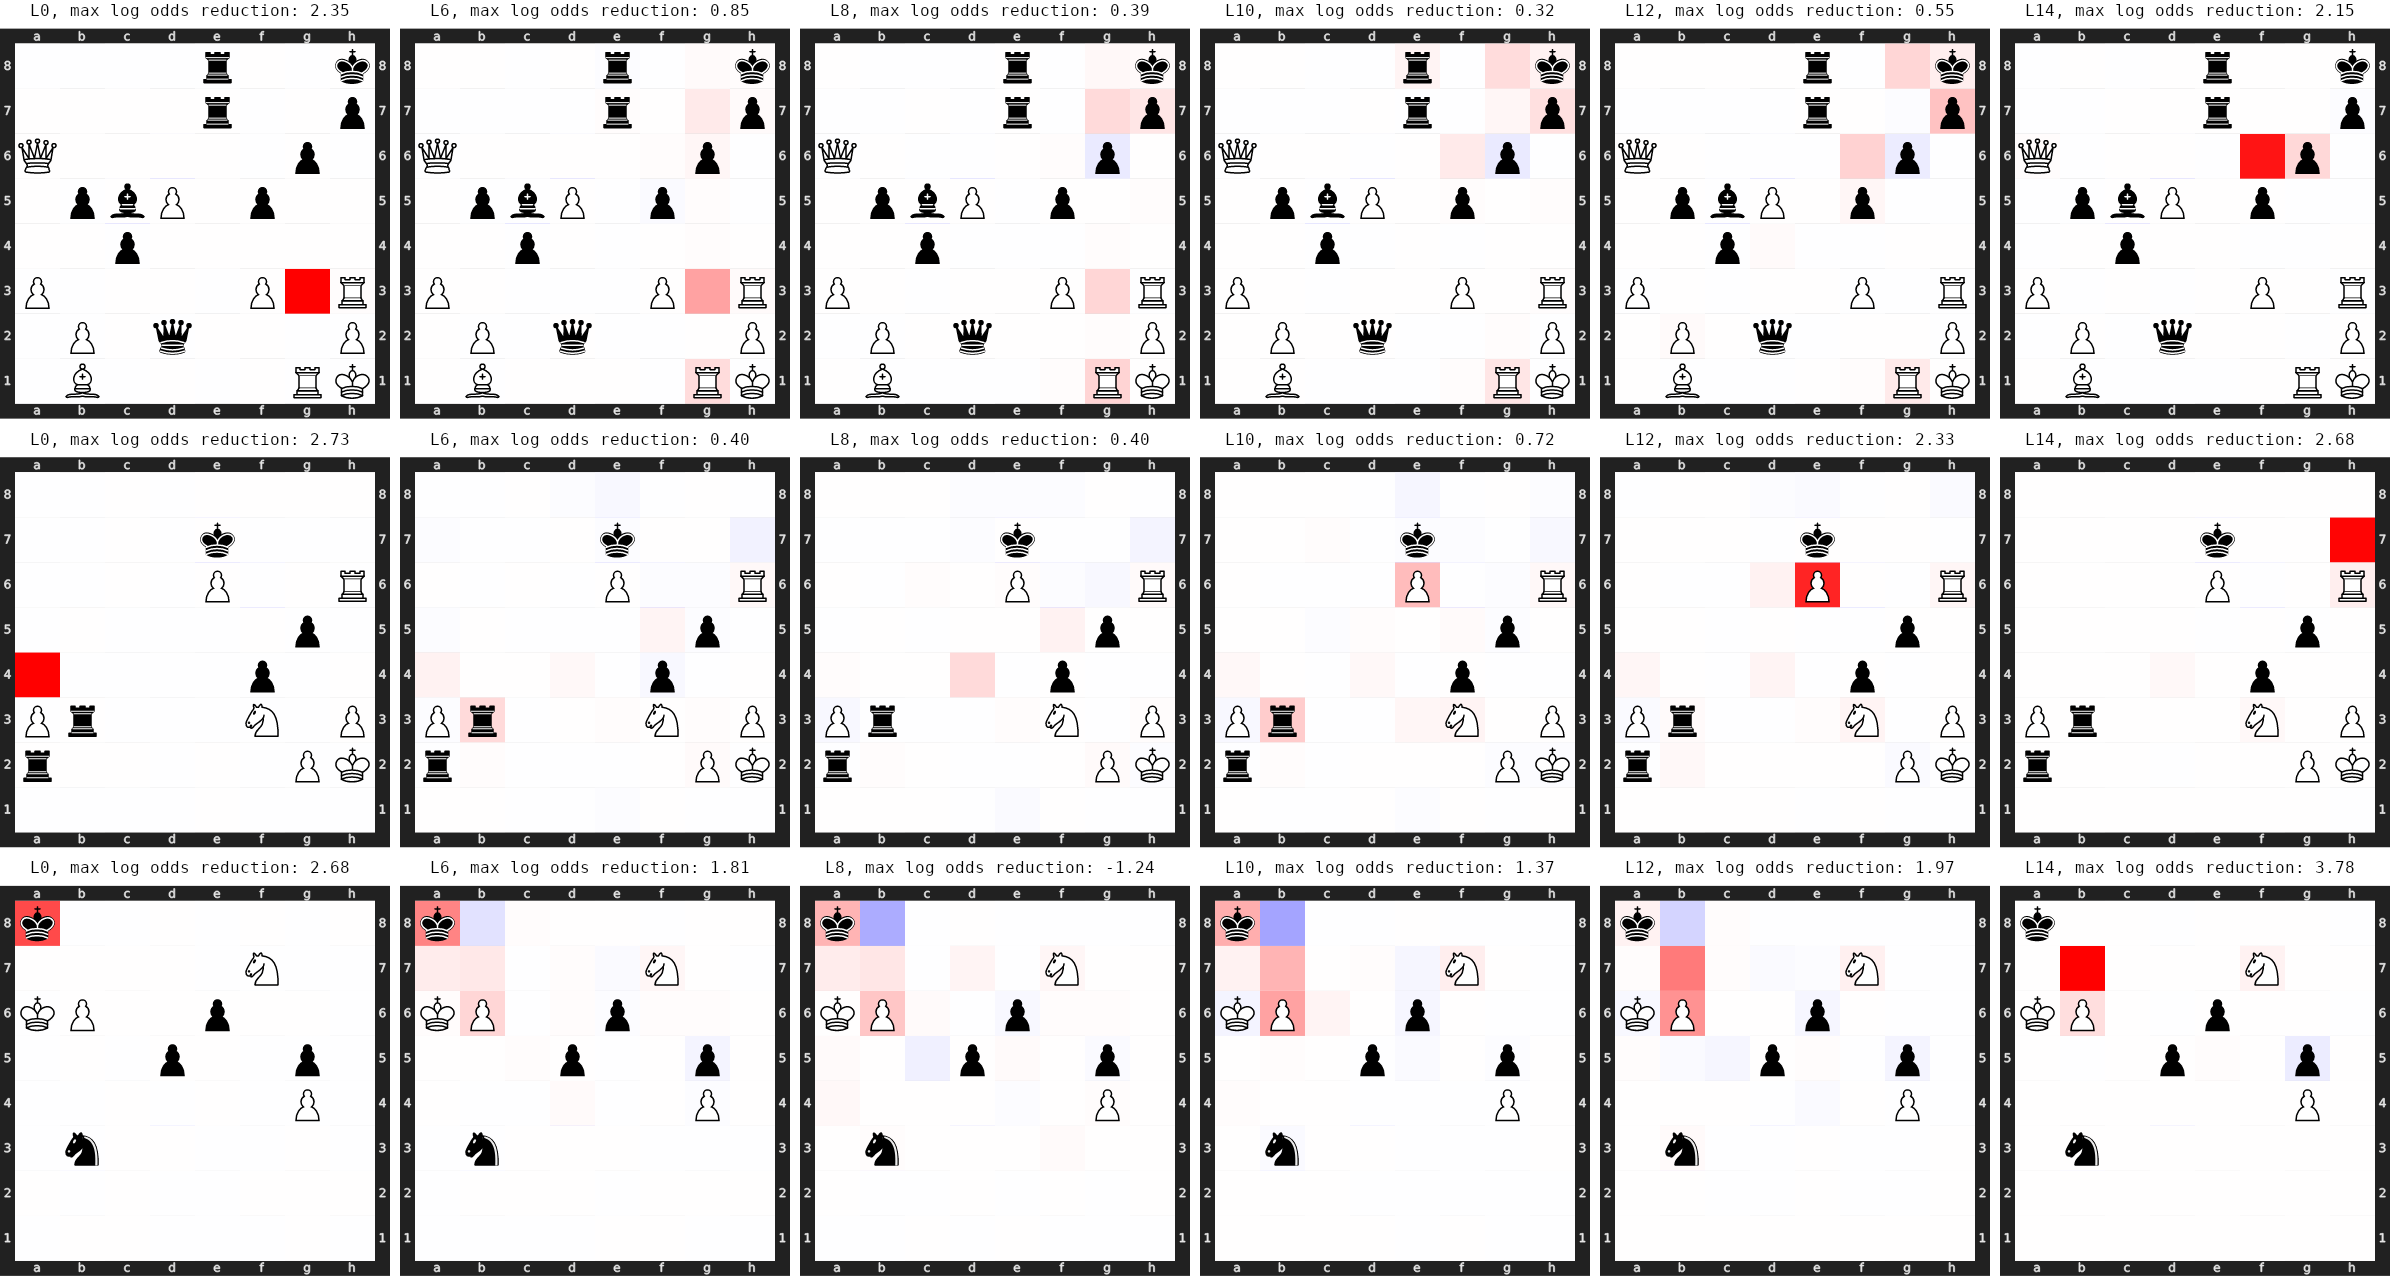

In [33]:
study.plot_examples(mask=mask, n=3)

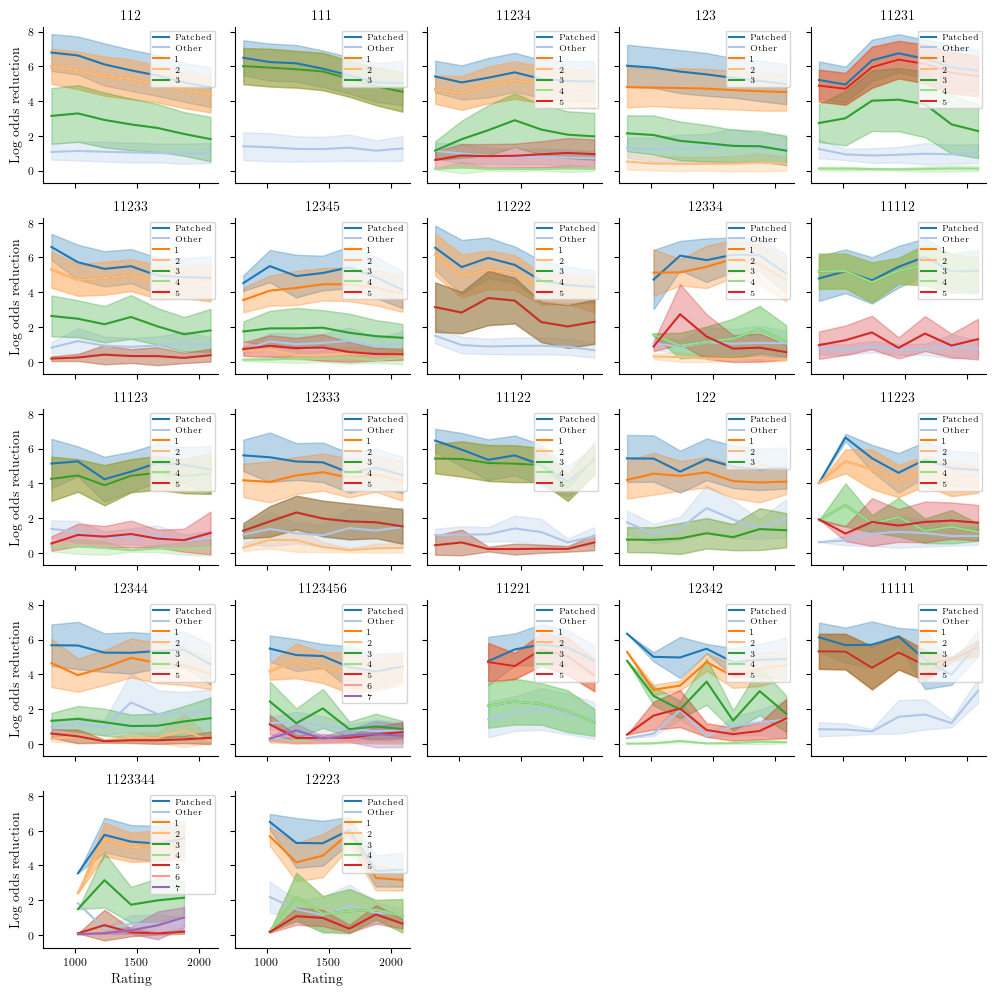

<Figure size 640x480 with 0 Axes>

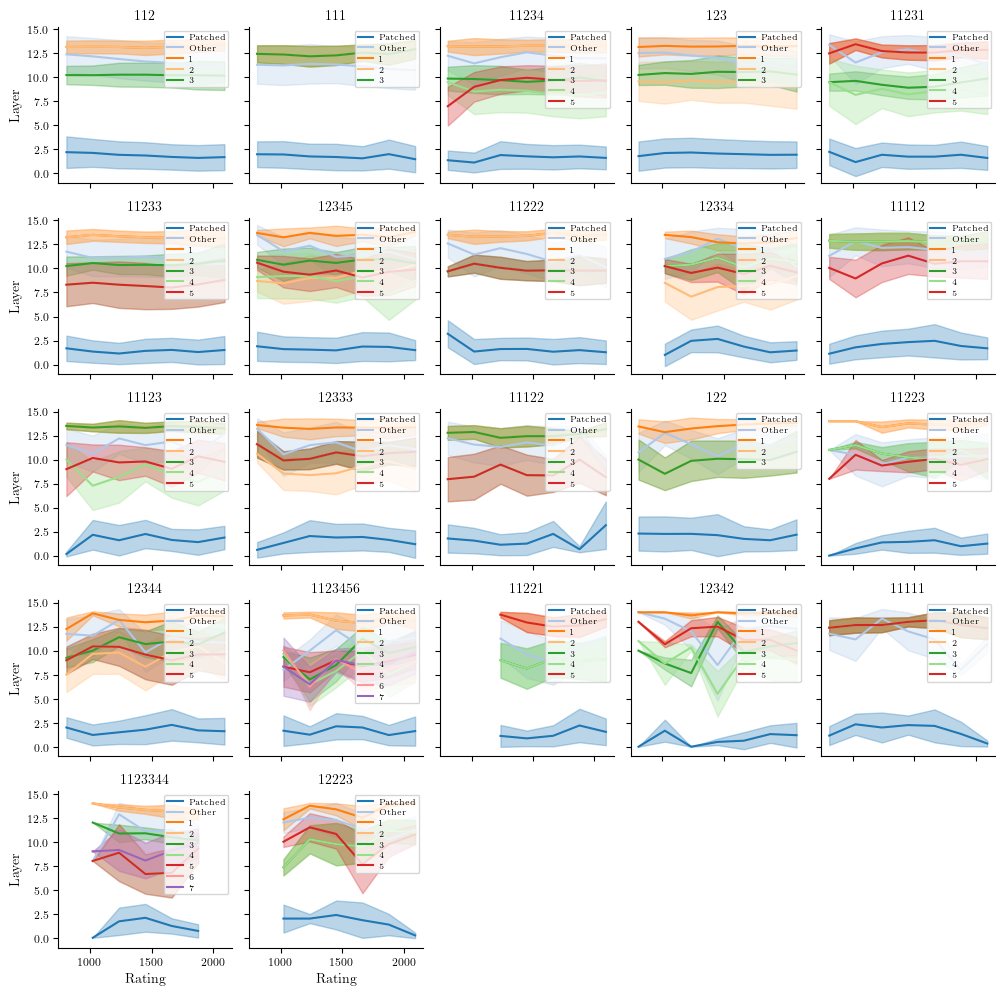

<Figure size 640x480 with 0 Axes>

In [27]:
# Usage:
study.plot_rating_grid(n_cols=5, allowed_lengths=[3, 4, 5, 6, 7, 8, 9], filename="rating_grid.pdf")
study.plot_rating_layer_grid(n_cols=5, allowed_lengths=[3, 4, 5, 6, 7, 8, 9], filename="rating_layer_grid.pdf")

In [ ]:
for possibility, mask in zip(list(study.good_results), study.good_mask):
    study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(0, 5000))

In [51]:
len(study.good_results.keys())

36

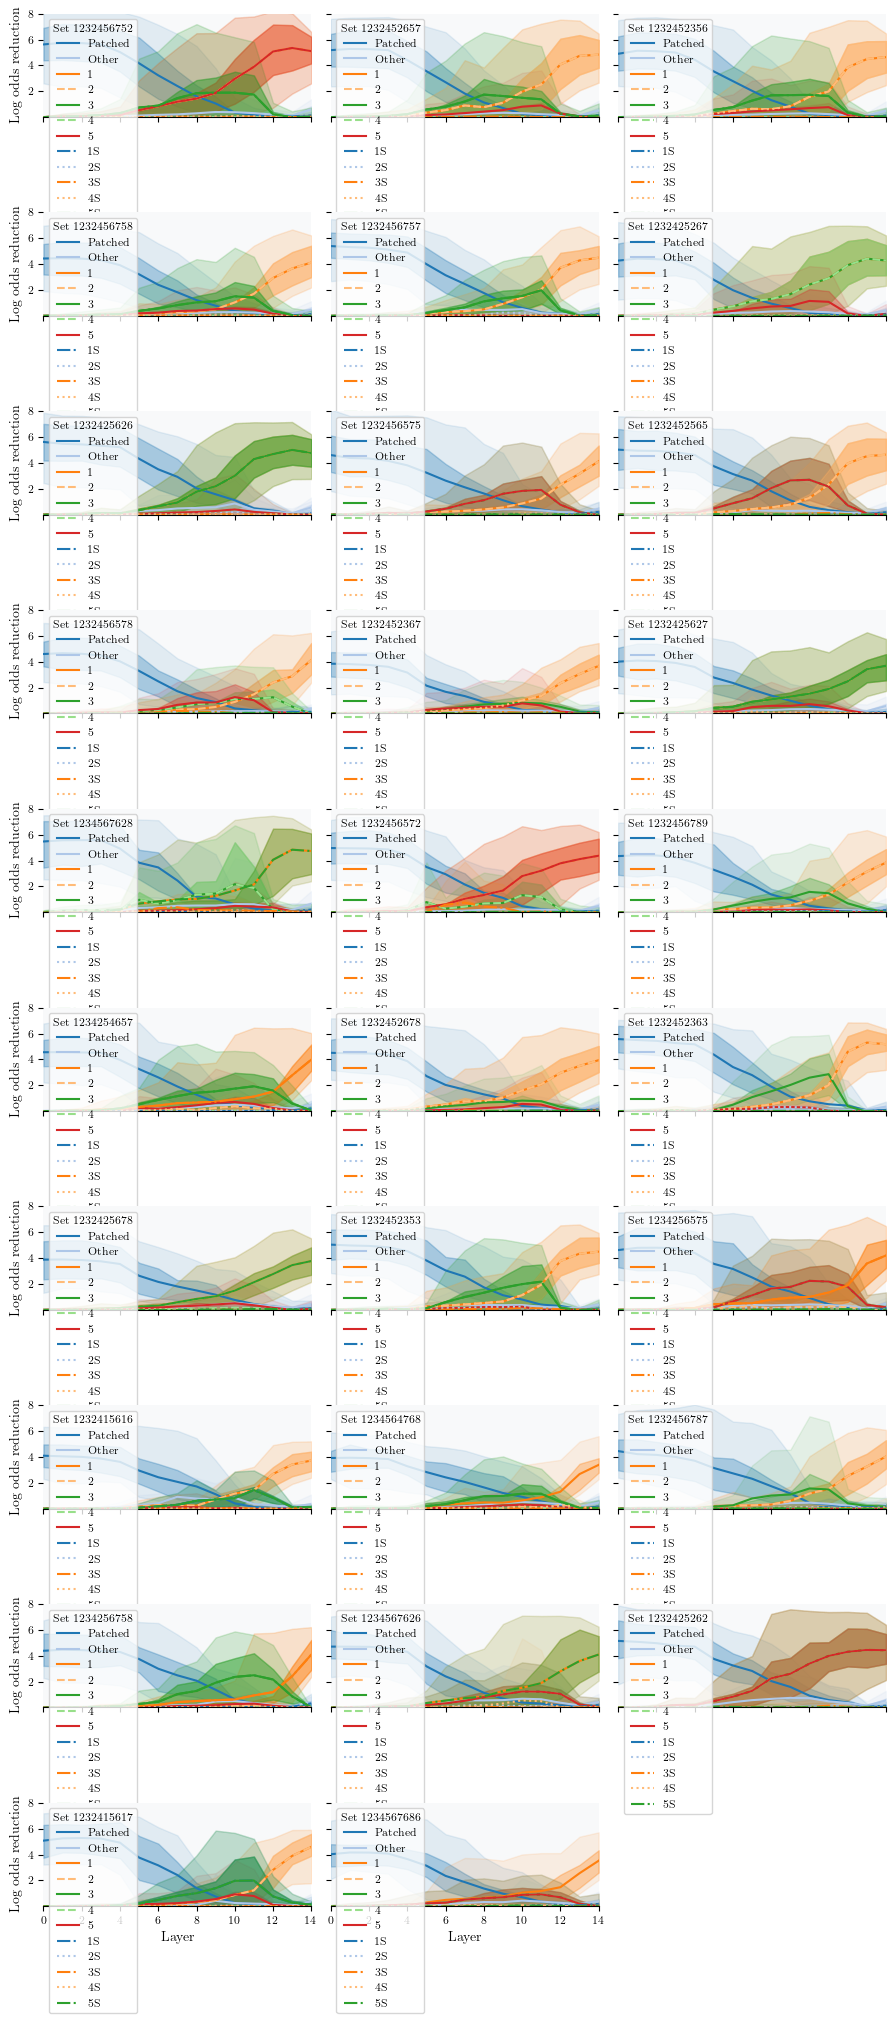

<Figure size 640x480 with 0 Axes>

In [54]:
study.plot_residual_effects_grid(n_cols=3, allowed_lengths=[5], filename="residual_effects_5_starting.pdf")

In [70]:
study.export_puzzles('1123344')

In [72]:
len(study.good_results['1123344'])

57

In [8]:
# for possibility, mask in zip(list(study.good_results), study.good_mask):
#     print(possibility)
#     try:
#         #print("Easy puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(0, 5000))
#         #print("Medium puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(1000, 2000))
#         #print("Hard puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(2000, 3000))
#     except ValueError:
#         continue

# Ratings

In [1]:
study.plot_rating_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4)
study.plot_rating_layer_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4)

NameError: name 'study' is not defined

## Attention heads

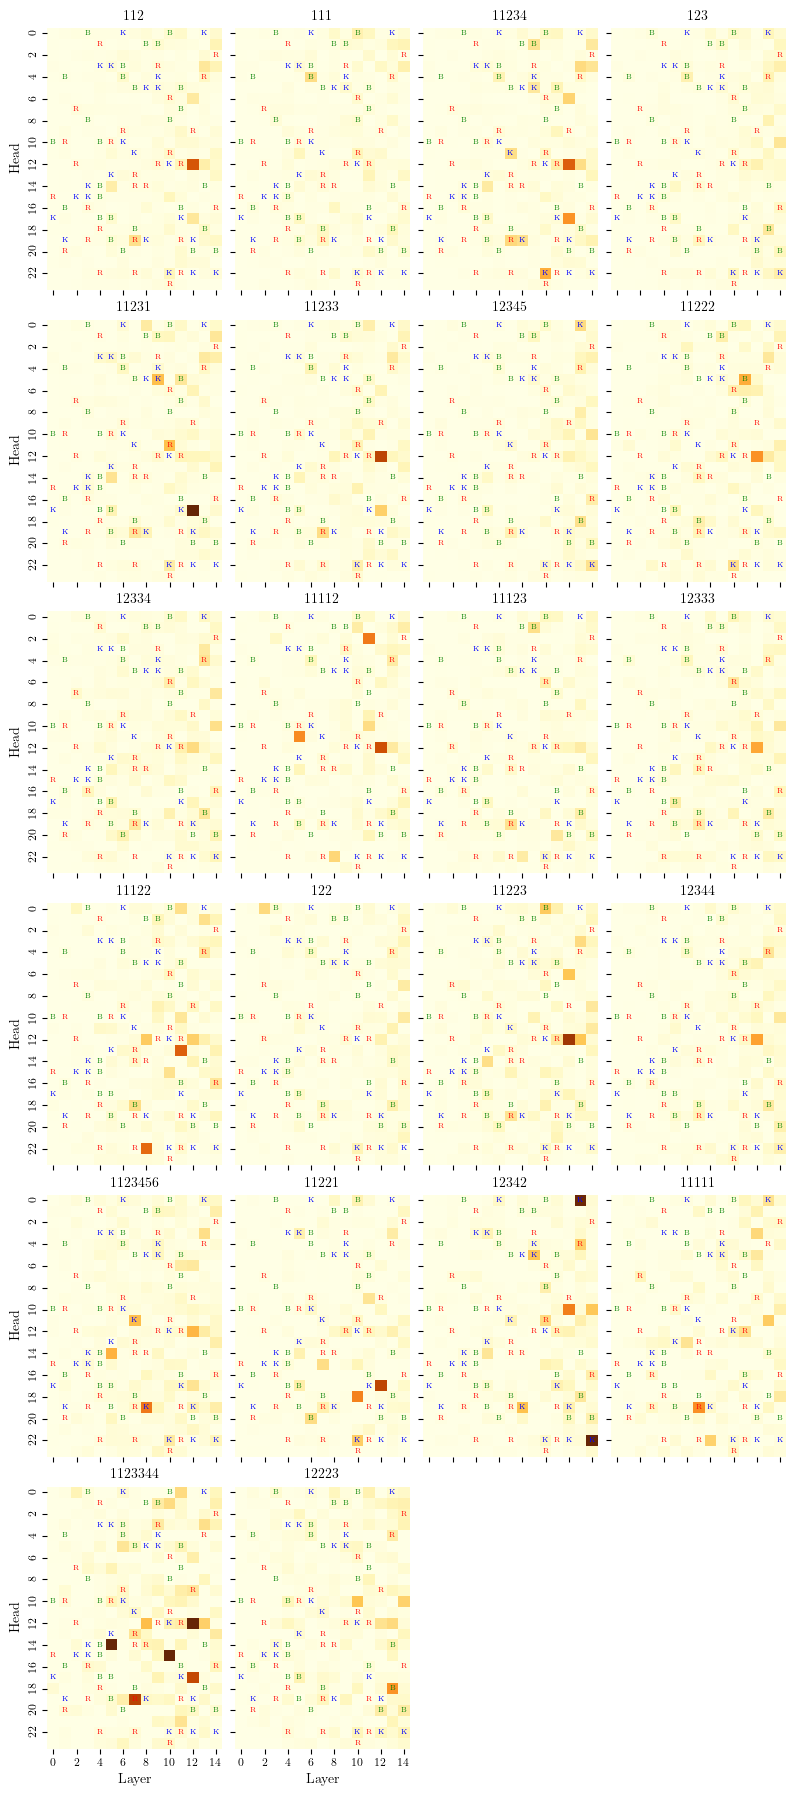

In [76]:
study.plot_attention_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4, vmax=0.73, rating_range=(1950, 5000))
study.create_head_to_possibilities_dict()
study.create_head_to_possibilities_dict_with_effects()

In [77]:
len(study.all_heads.keys())

10

In [78]:
# Convert the dict of 2D arrays to a 3D numpy array
keys = sorted(study.all_heads.keys())
first_array = study.all_heads[keys[0]]
num_rows, num_cols = first_array.shape
num_keys = len(keys)

all_heads_3d = np.zeros((num_keys, num_rows, num_cols))

for i, key in enumerate(keys):
    all_heads_3d[i] = study.all_heads[key]

print(f"Shape of the 3D array: {all_heads_3d.shape}")
print(f"Dimensions: {num_keys} keys x {num_rows} rows x {num_cols} columns")


Shape of the 3D array: (10, 15, 24)
Dimensions: 10 keys x 15 rows x 24 columns


In [79]:
all_heads_mean = np.mean(all_heads_3d, axis=0)

In [80]:
def dict_to_latex_table_2(data_dict, all_heads_mean):
    # Get the keys and sort them
    keys = sorted(data_dict.keys())
    
    # Get the shape of the first array to determine the number of columns
    first_array = data_dict[keys[0]]
    num_rows, num_cols = first_array.shape
    
    # Flatten the all_heads_mean array and get indices of top 10 values
    flat_indices = np.argsort(all_heads_mean.flatten())[-10:]
    
    # Convert flat indices to 2D indices
    columns_to_include = [(idx // num_cols, idx % num_cols) for idx in flat_indices[::-1]]
    
    # Start the LaTeX table
    latex_table = "\\begin{tabular}{l|" + "c" * len(columns_to_include) + "}\n"
    latex_table += "Key & " + " & ".join([f"L{i}H{j}" for i, j in columns_to_include]) + " \\\\\n"
    latex_table += "\\hline\n"
    
    # Add data rows
    for key in keys:
        array = np.nan_to_num(data_dict[key])
        row_data = []
        for i, j in columns_to_include:
            value = array[i, j]
            if abs(value) > 0.3:
                row_data.append(f"\\textbf{{{value:.2f}}}")
            elif abs(value) < 0.1:
                row_data.append(f"\\textcolor{{gray}}{{{value:.2f}}}")
            else:
                row_data.append(f"{value:.2f}")
        latex_table += f"{key} & " + " & ".join(row_data) + " \\\\\n"
    
    # End the LaTeX table
    latex_table += "\\end{tabular}"
    
    return latex_table

# Example usage
latex_output_2 = dict_to_latex_table_2(study.all_heads, all_heads_mean)
print(latex_output_2)


\begin{tabular}{l|cccccccccc}
Key & L12H12 & L12H17 & L7H19 & L13H3 & L5H14 & L12H6 & L10H22 & L13H12 & L14H1 & L13H18 \\
\hline
111 & \textcolor{gray}{0.02} & \textcolor{gray}{0.00} & \textcolor{gray}{0.08} & \textcolor{gray}{0.03} & \textcolor{gray}{0.04} & \textcolor{gray}{0.01} & \textcolor{gray}{0.05} & \textcolor{gray}{0.02} & 0.10 & \textcolor{gray}{0.09} \\
112 & \textbf{0.52} & 0.16 & 0.19 & 0.16 & 0.13 & 0.15 & \textcolor{gray}{0.10} & 0.13 & 0.11 & \textcolor{gray}{0.07} \\
11223 & \textbf{0.63} & \textcolor{gray}{0.10} & 0.18 & 0.21 & 0.20 & 0.27 & \textcolor{gray}{0.08} & 0.27 & \textcolor{gray}{0.09} & 0.10 \\
11231 & \textcolor{gray}{0.09} & \textbf{0.96} & 0.16 & 0.15 & 0.18 & 0.10 & 0.14 & \textcolor{gray}{0.09} & 0.17 & \textcolor{gray}{0.04} \\
11233 & \textbf{0.57} & 0.24 & 0.20 & 0.15 & 0.10 & 0.11 & 0.13 & \textcolor{gray}{0.09} & 0.11 & \textcolor{gray}{0.02} \\
11234 & \textbf{0.50} & \textbf{0.38} & 0.21 & 0.21 & 0.15 & 0.23 & \textbf{0.32} & 0.20 & 0.16 & \tex

In [58]:
# import numpy as np
# def dict_to_latex_table(data_dict):
#     # Get the keys and sort them
#     keys = sorted(data_dict.keys())
    
#     # Get the shape of the first array to determine the number of columns
#     first_array = data_dict[keys[0]]
#     num_rows, num_cols = first_array.shape
    
#     # Determine which columns to include and their maximum values
#     columns_to_include = []
#     for j in range(num_cols):
#         for i in range(num_rows):
#             if any(abs(np.nan_to_num(data_dict[key][i, j])) > 0.3 for key in keys):
#                 max_value = max(abs(np.nan_to_num(data_dict[key][i, j])) for key in keys)
#                 columns_to_include.append((i, j, max_value))
    
#     # Sort columns by their maximum value in descending order and keep only first 9
#     columns_to_include = sorted(columns_to_include, key=lambda x: x[2], reverse=True)[:9]
    
#     # Start the LaTeX table
#     latex_table = "\\begin{tabular}{l|" + "c" * len(columns_to_include) + "}\n"
#     latex_table += "Key & " + " & ".join([f"L{i}H{j}" for i, j, _ in columns_to_include]) + " \\\\\n"
#     latex_table += "\\hline\n"
    
#     # Add data rows
#     for key in keys:
#         array = np.nan_to_num(data_dict[key])
#         row_data = []
#         for i, j, _ in columns_to_include:
#             value = array[i, j]
#             if abs(value) > 0.3:
#                 row_data.append(f"\\textbf{{{value:.2f}}}")
#             elif abs(value) < 0.1:
#                 row_data.append(f"\\textcolor{{gray}}{{{value:.2f}}}")
#             else:
#                 row_data.append(f"{value:.2f}")
#         latex_table += f"{key} & " + " & ".join(row_data) + " \\\\\n"
    
#     # End the LaTeX table
#     latex_table += "\\end{tabular}"
    
#     return latex_table

# # Example usage
# latex_output = dict_to_latex_table(study.all_heads)
# print(latex_output)

In [66]:
# Print the results
for head, possibilities in study.head_to_possibilities.items():
    print(f"Head {head}: {len(possibilities)} possibilities")
    print(f"  {', '.join(possibilities)}")
    print()

Head (12, 12): 2 possibilities
  112, 123

Head (13, 4): 2 possibilities
  111, 122

Head (14, 1): 2 possibilities
  111, 122

Head (13, 18): 2 possibilities
  123, 122

Head (14, 10): 2 possibilities
  122, 123

Head (13, 3): 1 possibilities
  112

Head (7, 19): 1 possibilities
  112

Head (12, 17): 1 possibilities
  112

Head (12, 6): 1 possibilities
  112

Head (11, 13): 1 possibilities
  111

Head (11, 10): 1 possibilities
  111

Head (8, 12): 1 possibilities
  111

Head (14, 22): 1 possibilities
  123

Head (10, 22): 1 possibilities
  123

Head (6, 4): 1 possibilities
  122



In [69]:
# Print the results
for head, possibilities in study.head_to_possibilities_with_effects.items():
    print(f"Head {head}:")
    for possibility, effect in possibilities:
        print(f"  {possibility}: {effect:.4f}")
    print()

Head (13, 4):
  111: 0.2779
  122: 0.1666

Head (13, 18):
  123: 0.1815
  122: 0.1607

Head (14, 10):
  122: 0.1796
  123: 0.1746

Head (12, 12):
  112: 0.7319

Head (13, 3):
  112: 0.1939

Head (7, 19):
  112: 0.1896

Head (11, 13):
  111: 0.3864

Head (11, 10):
  111: 0.3510

Head (14, 22):
  123: 0.1762



In [ ]:
# (13, 3): Applies to 112 setups
# (13, 18): Applies to 123, 122 setups
# (12, 17): Applies to 11231 setups

# L12H17

In [15]:
study.export_puzzles('12344')

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:852: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

TypeError: AblationStudy.plot_ablation_effects() got an unexpected keyword argument 'ax'

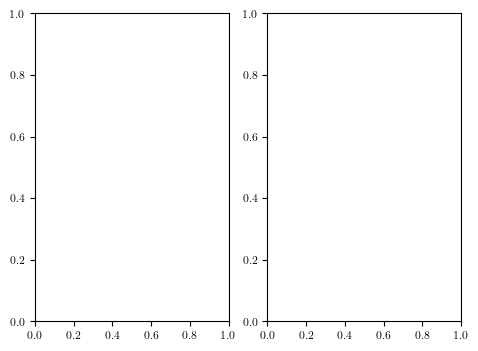

In [18]:
ablation_configs = [
    (['L5H14', 'L12H12', 'L12H17', 'L13H3', 'L13H12', 'L14H9', 'L14H11'], "11223"),
    (['L12H12', 'L12H17', 'L13H3', 'L13H18', 'L13H12', 'L7H19'], "1123344"),
    (['L12H12'], "112"),
    (['L12H12'], "123"),
    (['L12H17'], "11231"),
    (['L12H12', 'L13H3'], "11233"),
    (['L12H12', 'L13H3', 'L12H17'], "11234"),
    (['L12H12'], "1123456"),
    (['L12H12', 'L10H22'], "12223"),
    (['L12H12', 'L12H17'], "12334"),
    (['L12H12', 'L13H18'], "12344")
]

AblationStudy.plot_ablation_effects_grid(ablation_configs[:1], n_cols=2, filename="ablation_effects_grid_11223.pdf")

11223 L5H14


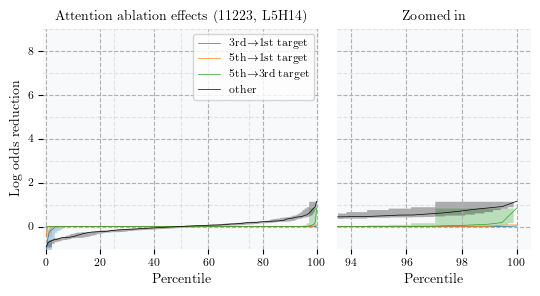

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L12H12


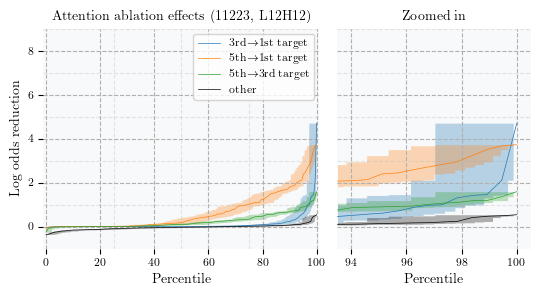

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L12H17


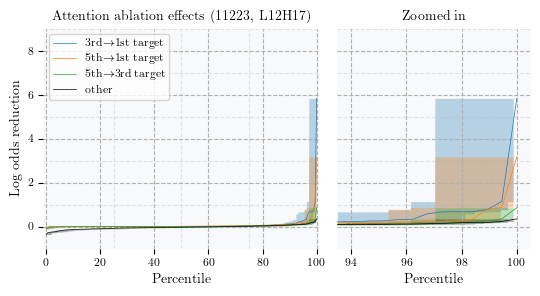

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L13H3


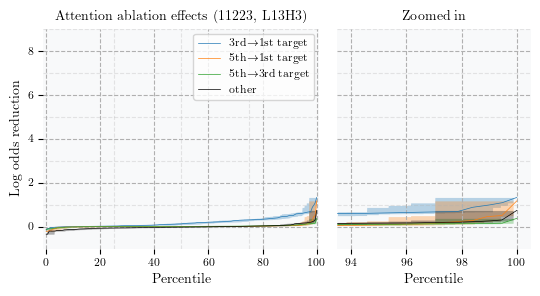

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L13H12


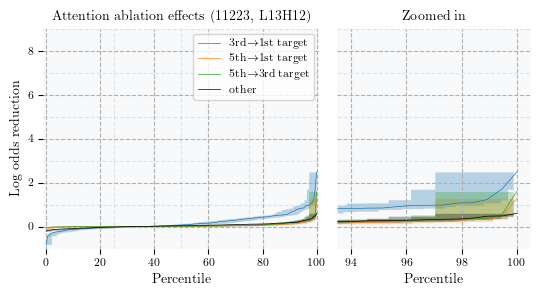

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L14H9


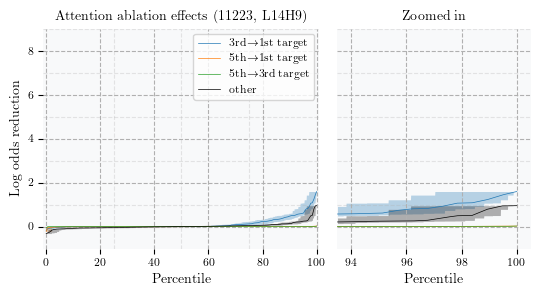

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11223 L14H11


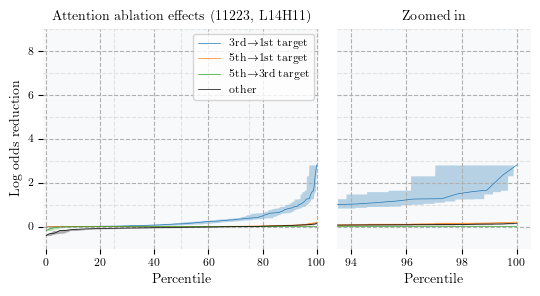

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L12H12


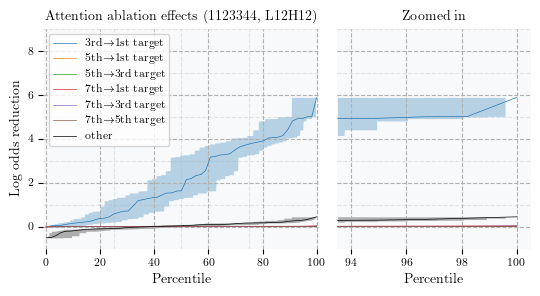

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L12H17


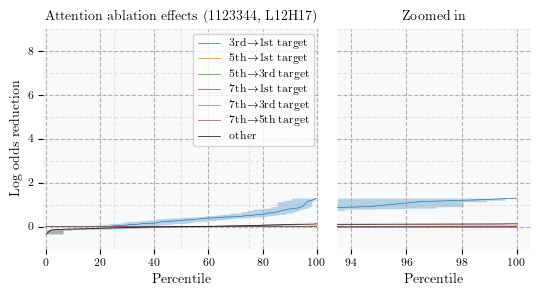

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H3


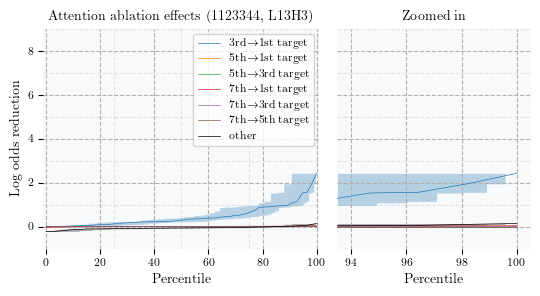

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H18


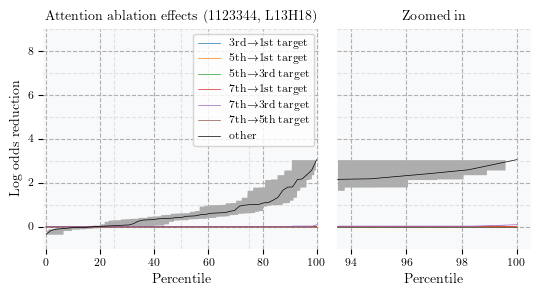

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L13H12


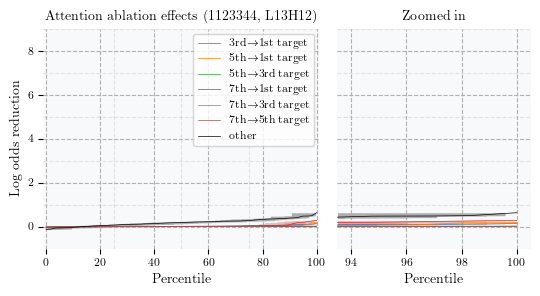

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123344 L7H19


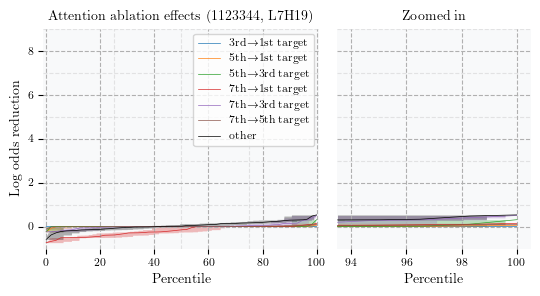

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

112 L12H12


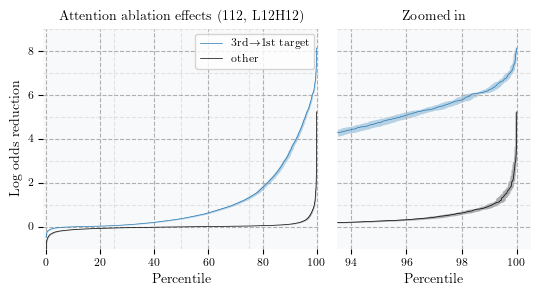

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

123 L12H12


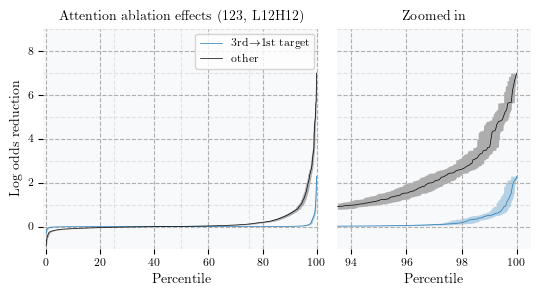

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11231 L12H17


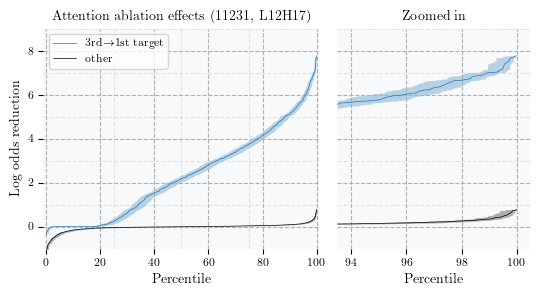

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11233 L12H12


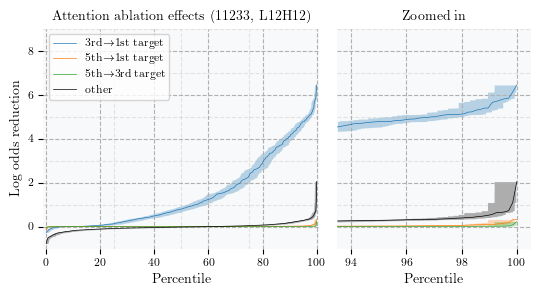

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11233 L13H3


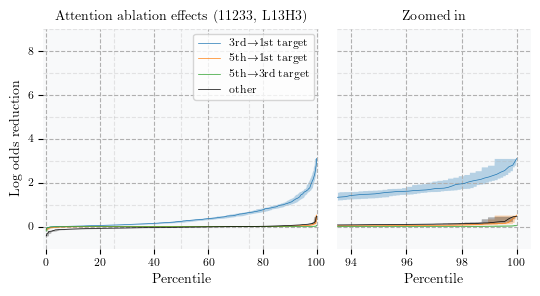

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L12H12


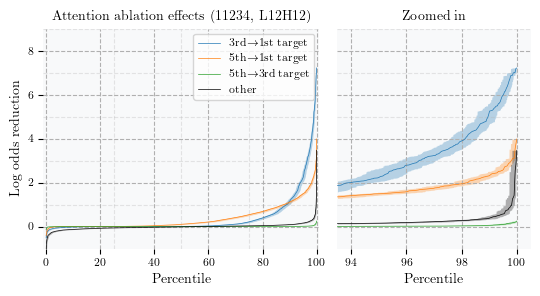

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L13H3


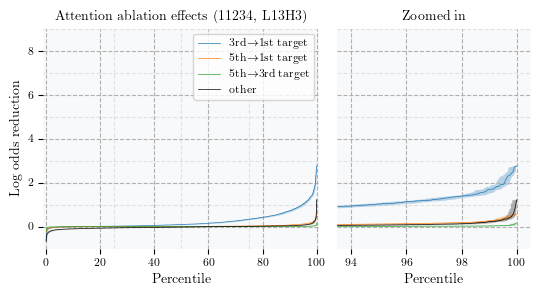

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

11234 L12H17


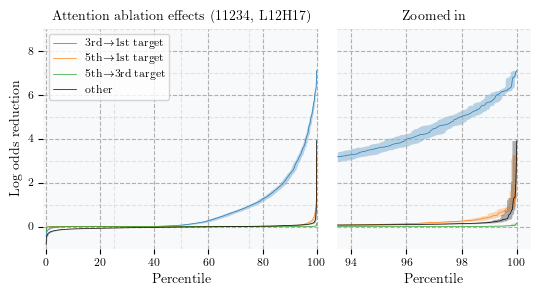

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

1123456 L12H12


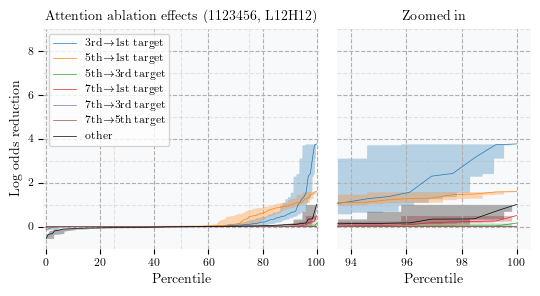

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12223 L12H12


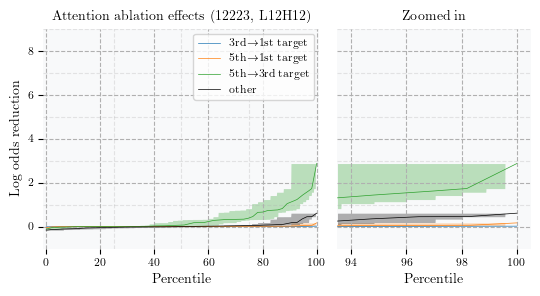

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12223 L10H22


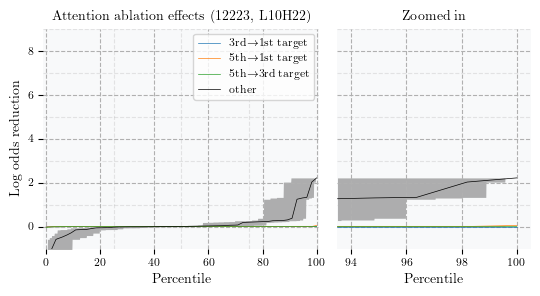

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12334 L12H12


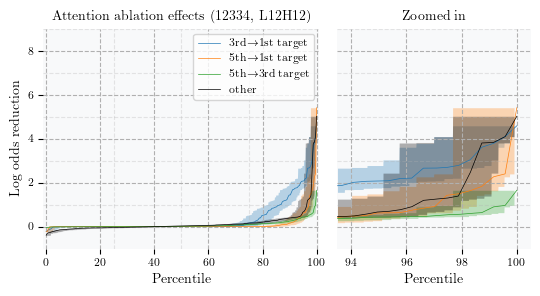

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12334 L12H17


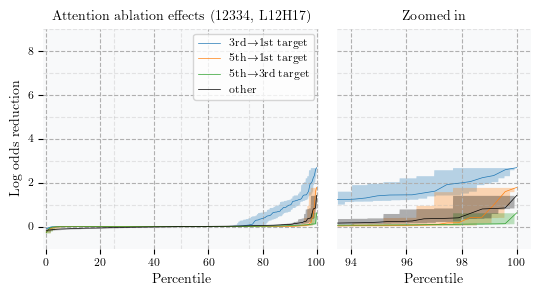

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12344 L12H12


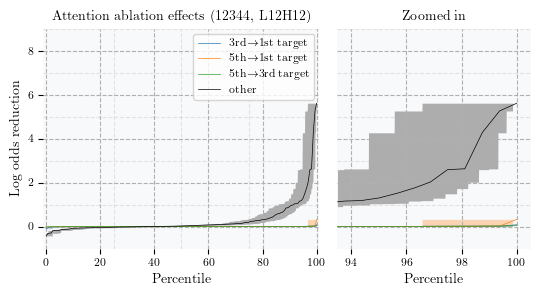

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:857: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

12344 L13H18


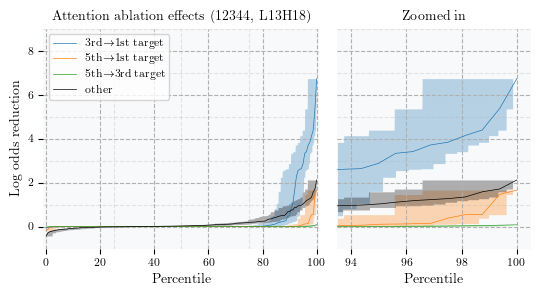

In [57]:
ablation_configs = [
    (['L5H14', 'L12H12', 'L12H17', 'L13H3', 'L13H12', 'L14H9', 'L14H11'], "11223"),
    (['L12H12', 'L12H17', 'L13H3', 'L13H18', 'L13H12', 'L7H19'], "1123344"),
    (['L12H12'], "112"),
    (['L12H12'], "123"),
    (['L12H17'], "11231"),
    (['L12H12', 'L13H3'], "11233"),
    (['L12H12', 'L13H3', 'L12H17'], "11234"),
    (['L12H12'], "1123456"),
    (['L12H12', 'L10H22'], "12223"),
    (['L12H12', 'L12H17'], "12334"),
    (['L12H12', 'L13H18'], "12344")
]

for cases, puzzle_set in ablation_configs:
    for case in cases:
        ablation_study = AblationStudy(folder_name=case + "_" + puzzle_set)
        print(puzzle_set, case)
        ablation_study.plot_ablation_effects(filename=f"ablation_effects_{case}_{puzzle_set}.pdf", puzzle_set=puzzle_set, LH=case)

In [39]:
list(study.good_results)

['112',
 '111',
 '11234',
 '123',
 '11231',
 '11233',
 '12345',
 '11222',
 '12334',
 '11112',
 '11123',
 '12333',
 '11122',
 '122',
 '11223',
 '12344',
 '1123456',
 '11221',
 '12342',
 '11111',
 '1123344',
 '12223']

0 ['c2a4', 'b4c3', 'a4a2', 'f6f7', 'a2f7'] [0.5920239090919495, 0.451749324798584, 0.8767738342285156, 0.6049863696098328, 0.8772741556167603]
0 ['c2a4', 'b4c3', 'a4a2', 'f6f7', 'a2f7'] [0.039466120302677155, 0.7535219788551331, 0.13934744894504547, 0.057812124490737915, 0.21995295584201813]
1 ['d6g3', 'h2h1', 'g3h4', 'f5h3', 'h4h3'] [0.9384021759033203, 1.0, 0.9300743937492371, 1.0, 0.8777098059654236]
1 ['d6g3', 'h2h1', 'g3h4', 'f5h3', 'h4h3'] [0.02824551984667778, 1.0, 0.6084303259849548, 1.0, 0.9214638471603394]
2 ['g2g4', 'h5h4', 'd6h6', 'f4h5', 'h6h5'] [0.934381902217865, 1.0, 0.9638696908950806, 1.0, 0.9636649489402771]
2 ['g2g4', 'h5h4', 'd6h6', 'f4h5', 'h6h5'] [0.034018658101558685, 1.0, 0.4383273124694824, 1.0, 0.7290634512901306]
3 ['g2g5', 'h4f4', 'g5f5', 'f4f3', 'f5f3'] [0.7100353240966797, 0.3128618001937866, 0.9383967518806458, 0.504242479801178, 0.9710922837257385]
3 ['g2g5', 'h4f4', 'g5f5', 'f4f3', 'f5f3'] [0.03426261618733406, 0.8016296029090881, 0.4578755497932434, 0

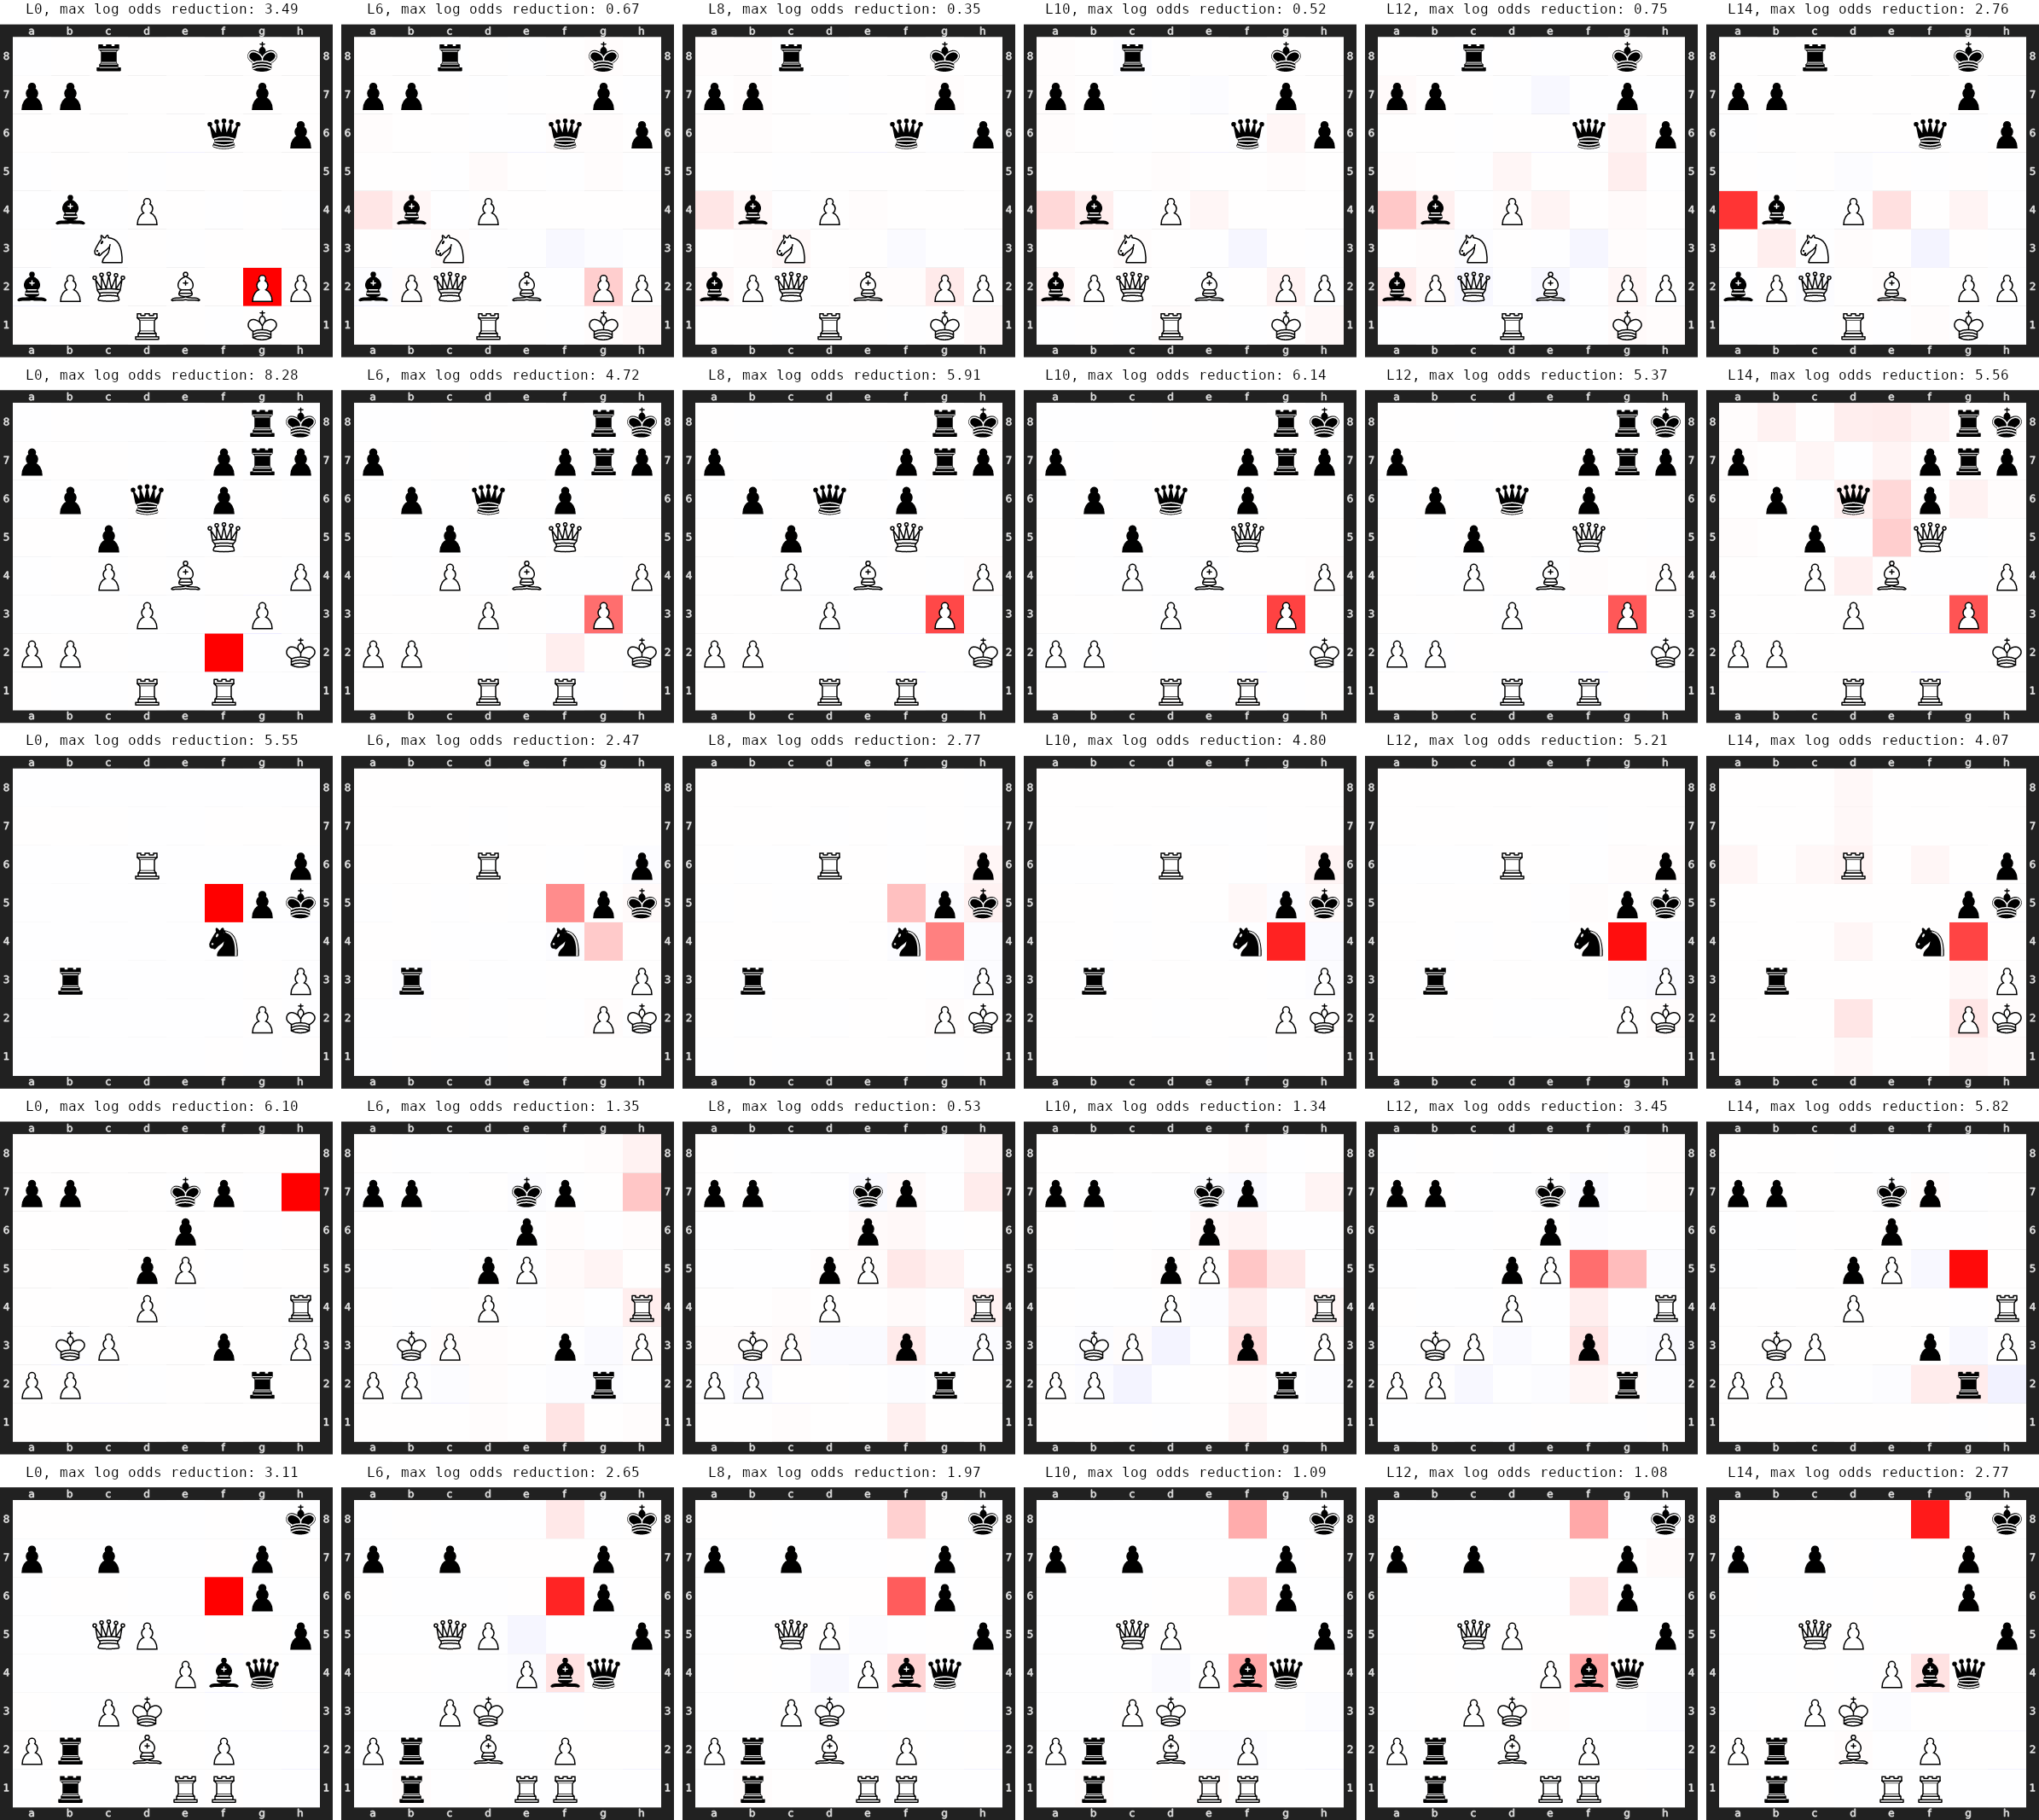

In [40]:
study.plot_examples(mask=study.good_mask[-7])

# Probing

In [ ]:
SETTING_TO_PRETTY_NAME = {
    "main": "Probe on trained model",
    "random_model": "Probe on random model",
}


def plot_probe_results(split="all"):
    fh.set(fast=False)
    plt.figure(figsize=(fh.HALF_WIDTH, 2))

    for i, setting in enumerate(["main", "random_model"]):
        results = np.zeros((15, 5))
        for seed in range(5):
            with open(f"results/probing/{split}/{seed}/{setting}.pkl", "rb") as f:
                new_results = pickle.load(f)
                results[:, seed] = new_results["accuracies"]

        means = results.mean(1)
        squared_seed_errors = results.var(1) / results.shape[1]
        # Size of the eval dataset is 30% of all puzzles
        squared_acc_errors = means * (1 - means) / (0.3 * len(puzzles))
        # 2 sigma errors
        errors = 2 * np.sqrt(squared_seed_errors + squared_acc_errors)

        max_layer = means.argmax()

        print(
            f"Max accuracy ({setting}, L{max_layer}): {means[max_layer]:.2f} +- {errors[max_layer]:.2f}"
        )
        plt.plot(
            means,
            label=SETTING_TO_PRETTY_NAME[setting],
            color=fh.COLORS[i],
            linewidth=fh.LINE_WIDTH,
        )
        plt.fill_between(
            range(15),
            means - errors,
            means + errors,
            color=fh.COLORS[i],
            alpha=fh.ERROR_ALPHA,
            linewidth=0,
        )

    plt.title("Third move prediction")
    plt.xlabel("Layer")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.ylim(0, 1.0)
    plt.xlim(0, 14)
    plt.gca().spines[:].set_visible(False)
    plt.gca().set_facecolor(fh.PLOT_FACE_COLOR)
    plt.grid(linestyle="--")
    plt.grid(which="minor", alpha=0.3, linestyle="--")

In [ ]:
plot_probe_results()
fh.save("figures/probing.pdf")

In [ ]:
plot_probe_results(split="different_targets")
fh.save(different_targets_dir / "probing.pdf")
plot_probe_results(split="same_targets")
fh.save(same_targets_dir / "probing.pdf")

# Piece movement heads

In [107]:
with open("interesting_puzzles.pkl", "rb") as f:
    puzzles = pickle.load(f)
len(puzzles)

22517

In [109]:
knight_heads

[(0, 17),
 (1, 19),
 (3, 14),
 (3, 15),
 (4, 3),
 (5, 3),
 (5, 13),
 (8, 5),
 (9, 5),
 (14, 22),
 (2, 15),
 (6, 0),
 (6, 10),
 (7, 11),
 (8, 19),
 (9, 4),
 (10, 12),
 (10, 22),
 (11, 17),
 (12, 19),
 (12, 22),
 (13, 0)]

In [76]:
len(knight_heads), len(bishop_heads), len(rook_heads)

(22, 27, 29)

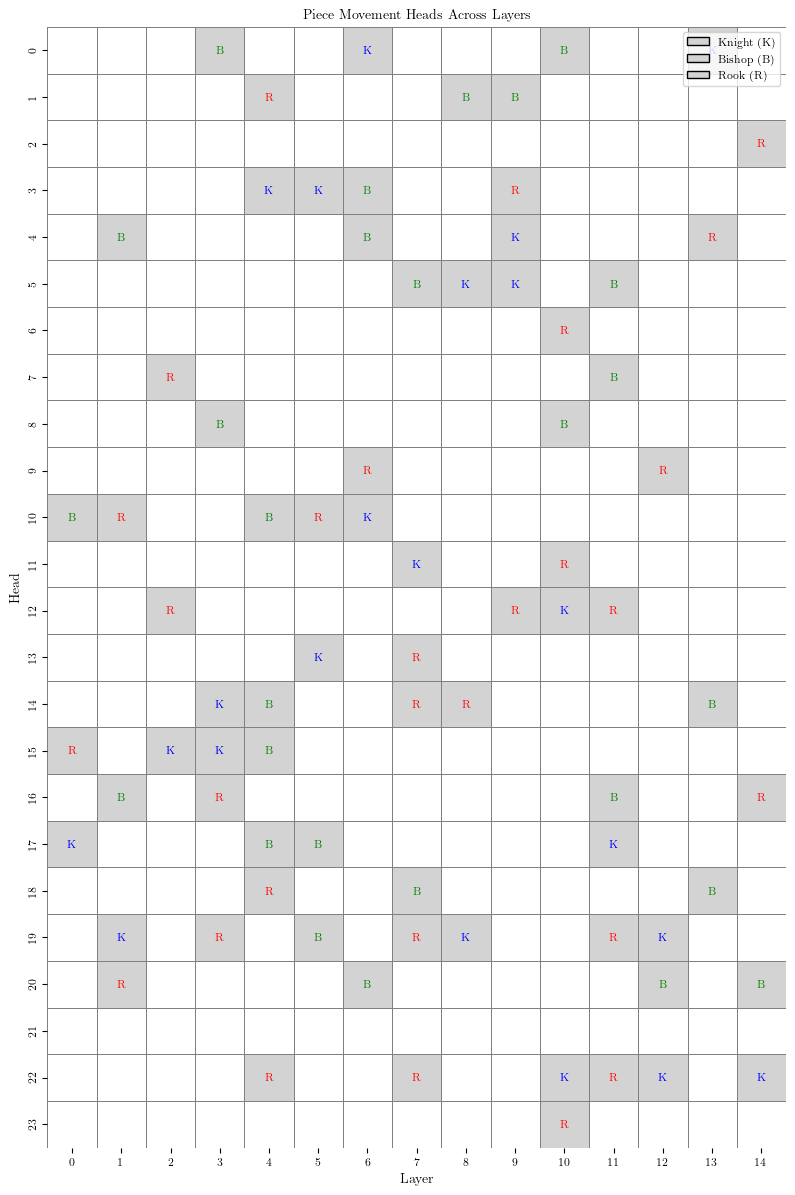

In [77]:
# Create a matrix to hold the data
n_layers = 15
n_heads = 24
data = np.full((n_heads, n_layers), '', dtype=object)

# Fill the matrix with values for each piece type
for layer, head in knight_heads:
    data[head, layer] = 'K'
for layer, head in bishop_heads:
    data[head, layer] = 'B'
for layer, head in rook_heads:
    data[head, layer] = 'R'

# Set up the plot
plt.figure(figsize=(8, 12))

# Create the heatmap
ax = sns.heatmap(data.astype(bool).astype(int), cmap=['white', 'lightgray'], 
                 cbar=False, linewidths=0.5, linecolor='gray')

# Add text annotations
for i in range(n_heads):
    for j in range(n_layers):
        if data[i, j]:
            text_color = 'blue' if data[i, j] == 'K' else 'green' if data[i, j] == 'B' else 'red'
            ax.text(j+0.5, i+0.5, data[i, j], ha='center', va='center', color=text_color, fontweight='bold')

# Customize the plot
plt.title('Piece Movement Heads Across Layers')
plt.xlabel('Layer')
plt.ylabel('Head')

# Create a custom legend
legend_elements = [Patch(facecolor='lightgray', edgecolor='black', label='Knight (K)'),
                   Patch(facecolor='lightgray', edgecolor='black', label='Bishop (B)'),
                   Patch(facecolor='lightgray', edgecolor='black', label='Rook (R)')]
plt.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [110]:
N = 4
patterns = torch.zeros(N, 15, 24, 64, 64, device=device)

boards = [LeelaBoard.from_puzzle(p) for _, p in puzzles.sample(N).iterrows()]

with model.trace(boards):
    for layer in range(15):
        patterns[:, layer] = model.attention_scores(layer).output.save()

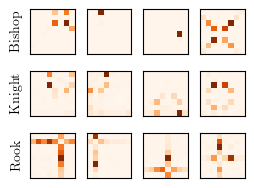

In [111]:
query_indices = random.sample(range(64), N)
plt.figure(figsize=(fh.HALF_WIDTH, 2))
layer = 5

layer_bishop_heads = [head for _layer, head in bishop_heads if _layer == layer]
layer_knight_heads = [head for _layer, head in knight_heads if _layer == layer]
layer_rook_heads = [head for _layer, head in rook_heads if _layer == layer]

if not (layer_bishop_heads and layer_knight_heads and layer_rook_heads):
    raise ValueError("No good heads in this layer, pick a different one")

bishop_head = random.choice(layer_bishop_heads)
knight_head = random.choice(layer_knight_heads)
rook_head = random.choice(layer_rook_heads)

fh.set()

for row, (name, head) in enumerate(
    zip(["Bishop", "Knight", "Rook"], [bishop_head, knight_head, rook_head])
):
    for i in range(N):
        plt.subplot(3, N, row * N + i + 1)
        if i == 0:
            plt.ylabel(
                name,
                rotation=90,
                labelpad=10,
                verticalalignment="center",
            )
        plt.imshow(
            patterns[i, layer, head, query_indices[i], :].cpu().numpy().reshape(8, 8),
            cmap="Oranges",
        )
        plt.xticks([])
        plt.yticks([])
fh.save("figures/piece_movement_patterns.pdf")

In [113]:
save_dir = Path("results/piece_movement_heads")
data = torch.load(save_dir / "effects.pt", map_location=device)
effects = data["effects"]
piece_movement_mask = data["mask"]

/tmp/ipykernel_2770328/120337627.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(save_dir / "effects.pt", map_location=device)


FileNotFoundError: [Errno 2] No such file or directory: 'results/piece_movement_heads/effects.pt'

In [ ]:
def plot_piece_movement_ablation(mask=None):
    if mask is None:
        mask = slice(None)
    else:
        mask = mask[piece_movement_mask]
    data = {}
    colors = {}
    for i, name in enumerate(["Main ablation", "Other piece types", "Random square"]):
        data[name] = effects[("key", name)].squeeze().cpu().numpy()[mask]
        colors[name] = fh.COLORS[i]
    fh.set()
    fh.plot_percentiles(
        data,
        title="Piece movement head ablation",
        colors=colors,
        figsize=(fh.HALF_WIDTH, 2),
        y_lower=-1,
        tick_frequency=25,
        y_ticks=[0, 2, 4, 6, 8],
    )

In [ ]:
plot_piece_movement_ablation()
fh.save("figures/piece_movement_ablation.pdf")

In [ ]:
plot_piece_movement_ablation(mask=different_targets_mask)
fh.save(different_targets_dir / "piece_movement_ablation.pdf")
plot_piece_movement_ablation(mask=same_targets_mask)
fh.save(same_targets_dir / "piece_movement_ablation.pdf")

# Positional encodings
These are the domain-specific positional encodings used by Leela.

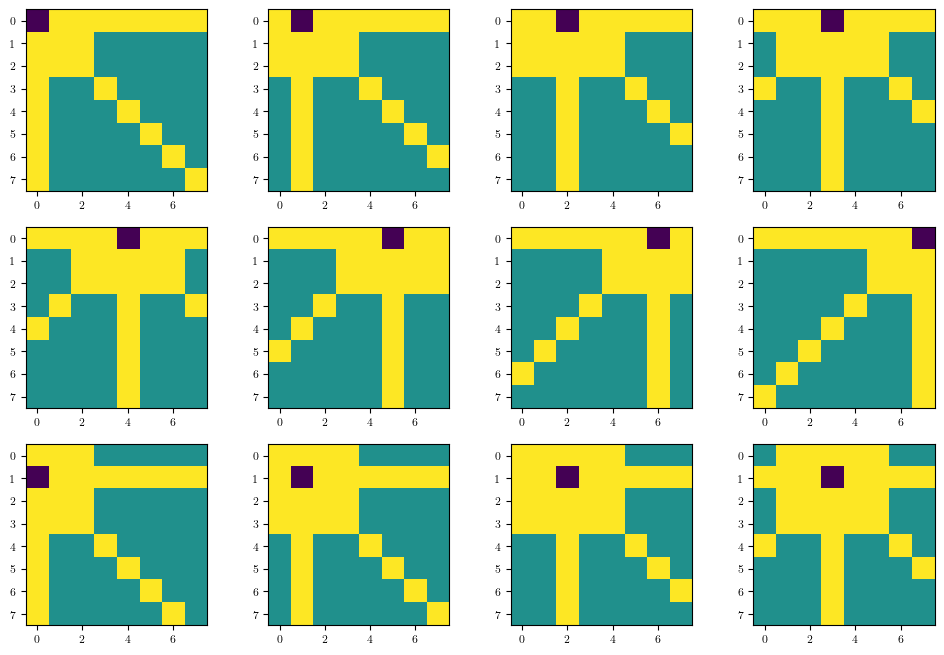

In [47]:
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(
        model._lc0_model.initializers.onnx_initializer_4.cpu()
        .numpy()[0, i]
        .reshape(8, 8)
    )

plt.show()